# Connectivety map: L1000 platform (phase I)


1.5 million experimets:<br> ~20K perturbation,4.5K knockdown and 3K over-expressions in ~100 cell-lines in triplicates <br> Not all cells are treated with all conditions

 The data is available on GEO  under submission number **GSE92742**

### *Load packages*

In [1]:
import cmapPy
import h5py
import pandas as pd
import numpy as np
import cmapPy.pandasGEXpress.parse_gct as pg
from cmapPy.pandasGEXpress.parse import parse
import pkg_resources

### *Setup file system*

Download these files from GEO, and <span style="color:red"> change the directory </span> to the one contains the files

In [199]:
import os
os.chdir("/home/ros/Desktop/cMAP_data/cMAP_GSE92742/") #your directory here


metadata_file="GSE92742_Broad_LINCS_sig_info.txt"
gene_data_file="GSE92742_Broad_LINCS_gene_info.txt"
data_file_lvl5="GSE92742_Broad_LINCS_Level5_COMPZ.MODZ_n473647x12328.gctx"

Fc_RNA_cutoff=0.8
L1000_cutoff=0.3


## Loading data

*Use metadata for level5 from the study. It means it is normalized, z-score and averaged over 3 samples per experiment.*

In [3]:
sig_info = pd.read_csv(metadata_file, sep="\t")

/home/ros/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
sig_info


,sig_id,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id
0,AML001_CD34_24H:A05,DMSO,DMSO,ctl_vehicle,CD34,0.1,%,0.1 %,24,h,24 h,AML001_CD34_24H_X1_F1B10:A05
1,AML001_CD34_24H:A06,DMSO,DMSO,ctl_vehicle,CD34,0.1,%,0.1 %,24,h,24 h,AML001_CD34_24H_X3_F1B10:A06
2,AML001_CD34_24H:B05,DMSO,DMSO,ctl_vehicle,CD34,0.1,%,0.1 %,24,h,24 h,AML001_CD34_24H_X1_F1B10:B05|AML001_CD34_24H_X...
3,AML001_CD34_24H:B06,DMSO,DMSO,ctl_vehicle,CD34,0.1,%,0.1 %,24,h,24 h,AML001_CD34_24H_X3_F1B10:B06
4,AML001_CD34_24H:BRD-A03772856:0.37037,BRD-A03772856,BRD-A03772856,trt_cp,CD34,0.37037,µM,500 nM,24,h,24 h,AML001_CD34_24H_X1_F1B10:J04|AML001_CD34_24H_X...
...,...,...,...,...,...,...,...,...,...,...,...,...
473642,TAK004_U2OS_96H:TRCN0000370007:1,TRCN0000370007,WWTR1,trt_sh,U2OS,1,µL,1 µL,96,h,96 h,TAK004_U2OS_96H_X1_B6_DUO52HI53LO:J10|TAK004_U...
473643,TAK004_U2OS_96H:TRCN0000370678:1,TRCN0000370678,GRB10,trt_sh,U2OS,1,µL,1 µL,96,h,96 h,TAK004_U2OS_96H_X1_B6_DUO52HI53LO:E02|TAK004_U...
473644,TAK004_U2OS_96H:TRCN0000370697:1,TRCN0000370697,GRB10,trt_sh,U2OS,1,µL,1 µL,96,h,96 h,TAK004_U2OS_96H_X1_B6_DUO52HI53LO:A18|TAK004_U...
473645,TAK004_U2OS_96H:TRCN0000370751:1,TRCN0000370751,GRB10,trt_sh,U2OS,1,µL,1 µL,96,h,96 h,TAK004_U2OS_96H_X1_B6_DUO52HI53LO:I12|TAK004_U...


In [5]:
# print list of cell-lines
(sig_info["cell_id"].value_counts()).index

Index(['VCAP', 'MCF7', 'PC3', 'A549', 'A375', 'HT29', 'HA1E', 'HCC515',
       'HEPG2', 'NPC', 'ASC', 'NEU', 'SKB', 'PHH', 'SKL', 'BT20', 'MDAMB231',
       'HS578T', 'MCF10A', 'SKBR3', 'HEK293T', 'FIBRNPC', 'SW480', 'HEKTE',
       'NKDBA', 'THP1', 'NOMO1', 'U937', 'JURKAT', 'HUH7', 'SHSY5Y', 'SKM1',
       'SKMEL1', 'A673', 'RMUGS', 'HEC108', 'CORL23', 'HCC15', 'SNUC4',
       'HCT116', 'NCIH2073', 'SW620', 'EFO27', 'RKO', 'NCIH596', 'LOVO', 'AGS',
       'OV7', 'SNU1040', 'MDST8', 'HL60', 'SW948', 'H1299', 'SKMEL28',
       'JHUEM2', 'TYKNU', 'DV90', 'RMGI', 'NCIH508', 'SNGM', 'COV644', 'SKLU1',
       'PL21', 'WSUDLCL2', 'CL34', 'NCIH1694', 'HT115', 'T3M10', 'NCIH1836',
       'SNUC5', 'U2OS', 'CD34', 'U266', 'MCH58', 'HS27A', 'NCIH716'],
      dtype='object')

In [6]:
# print list of perturbation
for (x) in sig_info["pert_iname"].value_counts().index: print(x)

DMSO
EMPTY_VECTOR
GFP
vorinostat
lacZ
trichostatin-a
wortmannin
geldanamycin
LUCIFERASE
RFP
UnTrt
sirolimus
KRAS
ERBB3
LY-294002
JUN
curcumin
CFLAR
GSK3A
MET
BAD
MYC
estradiol
PARP2
EGFR
fulvestrant
tozasertib
PTK2
IGF1R
genistein
EGF
sulforaphane
tamoxifen
BRAF
PTPN12
ABL1
PHKG2
pgw
AKT1
ERG
raloxifene
withaferin-a
STK33
CHEK2
CDK2
dexamethasone
PAX8
tretinoin
MAPK9
CRKL
thioridazine
MAPK13
IGF1
CDK6
DDR1
tanespimycin
JAK1
BRD-K98948170
CDKN1A
RPS6KA1
CHEK1
CSK
MELK
troglitazone
YES1
RET
IL4
PPARG
olaparib
PIK3CB
EZH2
parthenolide
ROCK1
GSK3B
ATM
TGFBR2
panobinostat
resveratrol
AKT3
EIF2AK3
barasertib-HQPA
MTOR
selumetinib
NRAS
TL-HRAS-61
EXT1
ERBB4
CSNK1E
PIK3C2A
MAP2K4
TNF
TBK1
PIK3R1
E2F1
estriol
INS
AKT2
SFN
gemcitabine
PRKCZ
PDPK1
AURKA
KIF11
IFNG
IL6
MST1R
PRKACA
INSR
doxorubicin
WT1
LMNB2
tert-butylhydroquinone
BRD-K93367411
LDHA
FLT3
IGF2
RPS6KA3
BTK
SGK1
PGK1
LYN
pifithrin-mu
AKR1C2
manumycin-a
HDAC1
veliparib
THBS1
GAS6
NVP-AUY922
PF-04217903
SRSF2
MAPK14
GNE
BCL2
gefitinib


PIP4K2C
AGTR1
CHIC2
CYTH1
ELF1
IL2RB
VN1R4
MDH2
WFDC2
RFX6
GABPB2
AFP
CDH1
EPHB2
TLR2
CNOT7
GNG5
PPP2CB
HLA-DRB3
PSAT1
TTC3
MLL3
CLK4
POLR2H
ZNF689
SIK3
PPM1B
EHMT2
SLC30A2
MDM4
TIMP4
NUAK1
ZNF653
CTGF
EMD
RARRES3
CCBL1
TLR5
EFNB2
BTBD3
ZNF114
SOCS1
CCNL1
ZFP112
CDC25C
KRT26
PKN1
ING2
ASF1B
levonorgestrel
PTRF
VIM
RGS4
TUBB3
ARHGEF7
HMMR
erythromycin
penfluridol
B4GALT3
ZNF519
OR52B2
LTBR
KNG1
PIAS1
ABCB5
ELK3
indirubin
ATF3
LARS
PSMA5
CPD
GNAI3
IFI30
RERG
HOXC10
C5ORF62
DLX3
GMPR2
ZBTB49
RAB5A
TFDP2
MXD3
XPR1
HLA-DRA
CYC1
RASD1
HSD17B4
ASF1A
GOT2
S100A1
alitretinoin
ANPEP
PPP1R13B
BLVRB
ZNF365
TOX2
APEH
RIPK3
ramipril
B3GAT3
PVRL2
POU2AF1
chlorambucil
EGR3
AKTIP
FUT2
A2M
OPN5
ID1
LARS2
NME4
HSD17B2
valsartan
AP4S1
ZNF195
ST13
PSMB8
ABCG2
APOC2
GBGT1
POU2F1
APOA2
OTX1
TBP
MRGPRX3
LPAR5
megestrol
ARPC1A
S100A11
ZBTB20
GBA
BCL6B
CERS3
ZNF581
MAPKAP1
UTS2R
ZNF238
PREP
OSR2
ABCA5
GCLM
RARG
SLC25A5
HOPX
ANXA2
PTPN6
VN1R5
vinpocetine
TBX20
ZNF212
OTX2
GTF2F2
GPR139
PLA2G12A
TNFRSF19
ETV5
KLR

BRD-A09164687
RAN-03
ST-4066738
BRD-A81530502
BRD-K46558254
BRD-K35961280
ST-208960
BRD-K33164466
BRD-K98634983
BRD-K72451865
BRD-K47709646
BRD-K62748479
epothilone
axitinib
BRD-K66426634
BRD-K47825575
BAS-00594560
BRD-K26367064
DMeOB
BRD-K76425827
BRD-K14842454
BRD-K56518176
SEW-05685
mofezolac
TUL-XIX029
BRD-K55536701
BRD-K10010115
BRD-A84102390
BRD-K48950795
QW-BI-011
ST-4028268
BRD-K02701279
BRD-K84114569
BRD-K42568865
TUL-XX025TFA
BRD-A25416824
BRD-A94381689
BRD-K33392208
MW-STK33-3B
BRD-A22272113
BRD-K54573313
BRD-K74949371
BRD-K63954456
BRD-K00944562
SA-1922257
BRD-K95895342
BRD-K93215584
TUL-XVIII076
BRD-A57300602
BRD-K14316227
BRD-K66224104
BRD-K35638681
ST-012015
BRD-K76938712
BRD-K00486725
BRD-K30194621
BRD-A06131576
BRD-K93296644
BRD-K29622226
BRD-K14790374
BRD-K16309743
I-070754
BRD-A16581344
ispinesib
BRD-K19624190
BRD-K48823327
BRD-K59488055
mocetinostat
BRD-K96326565
ST-019366
ST-4070043
RAN-05
BRD-A73847809
BRD-K52831896
BRD-K22828860
BRD-K75035820
BRD-K11362964
BRD-A0

BRD-A32440707
3-methyl-GABA
GNAL
Gdf7
BRD-K02117849
lomifylline
PASK
mupirocin
BRD-K17139610
MLKL
TCACAGA
BRD-K90610876
BRD-K16257790
ataluren
BRD-K23958338
FRS2
BRD-K14749055
BRD-K40276799
SA-247654
TCATCTG
BRD-K80718156
BRD-K59805090
BRD-K79797751
ATGAAGG
PAPD5
ARG-CSC2-40
1-monopalmitin
erbstatin-analog
BRD-K76103428
AAGGAAT
GAGAAGA
BRD-K35090513
TGGAGAA
DYRK4
BRD-K27855499
BRD-K69548259
GTGCAGT
BRD-K76318793
PANK1
TCCTAAT
BRD-K15790516
cefpodoxime
BRD-K74318028
BRD-K73400194
BRD-K91016007
TGGAAGA
BRD-K83072410
BRD-K42743267
TAGCATA
TTCCTCT
BRD-K86191692
BRD-K89994146
BMX
bimatoprost
eprosartan
BRD-K98824517
STYK1
BRD-K31697605
ACCCATC
doxycycline
BRD-K32444480
CVF-SUMO-11
BRD-K58223721
nimetazepam
cetraxate
EPHA7
IP6K3
parecoxib
I-606051
bromfenac
BRD-K95411194
AAGTATG
ACCGACT
BRD-K47586560
4-carboxy-3-hydroxyphenylglycine-(RS)
TRPM6
TGGGAAT
olmesartan
BRD-K78075916
BRD-K99638701
AACTCTA
TCTCAAC
TTCTGAC
BRD-K12676148
nitrazepam
milnacipran
TTGAGAC
tienilic-acid
ACCAGTA
TCCTCAA
tetr

BRD-K98044070
ATCGAGG
BRD-K71672862
BRD-K18337230
BRD-K05323441
BRD-K42357106
CDK11A
BRD-K65715788
BRD-K81224183
BRD-K02354331
BRD-M45755366
BRD-K76885481
BRD-K04230416
BRD-K79106006
BG-1021
BRD-K20790586
BRD-K57950796
BRD-K95847244
BRD-K32183200
BRD-K53283097
ketocholesterol
BRD-K73434853
BRD-K30155575
AGCAGTC
AK8
BRD-K89675250
ATCAACG
BRD-K86981020
CTGGGTC
BRD-K68911617
BRD-K49988102
BRD-A79058669
BRD-K31314139
BRD-K60760276
TCACGCC
BRD-K86910216
BRD-K39014692
BRD-K29360016
BRD-K86303874
BRD-K04985042
TCAGGGT
BRD-K43327166
BRD-K14215828
GTGGAGC
ATATCAG
BRD-K07064094
BRD-K35637774
BRSK2
BRD-K83654676
BRD-K06380515
BRD-K90256762
BRD-K46769156
AGGATCC
BRD-K00951345
BRD-K14971087
BRD-K32069250
CAATTTC
BRD-K69790925
BRD-K34106732
CCTCTAG
TCAGAAT
BRD-K78904620
ACCTCAA
BRD-M40384033
TCCGTGT
BRD-K07627743
BRD-K65851733
GEMIN2
BRD-K23060602
MPP3
BRD-K93859331
BRD-K07852637
1,2,3,4-tetrahydroisoquinoline
BRD-K02317159
BRD-K45319476
BRD-K07660364
BRD-K92439564
TTCTCAC
BRD-K95352880
M-344
BRD-K6

BRD-K58869323
BRD-K68085828
BRD-K12515921
BRD-K24893212
ACCTAGA
ATCGGAT
BRD-K36080978
BRD-K41705395
BRD-K04139743
TGATGGA
BRD-K07935321
CAAAGTG
BRD-K77758624
BRD-K17407318
AGTTAAT
BRD-K83785854
BRD-K10743257
BRD-K94274196
BRD-K57061210
BRD-K25298364
BRD-K05713002
BRD-K74634175
TCGCAGA
BRD-K97143621
AATTAGA
BRD-K21107294
BRD-K98419480
TACAGCG
BRD-K24625151
BRD-K78327149
BRD-K58791909
BRD-K89840812
BRD-K20154295
BRD-K77811363
BRD-K43345858
BRD-K06614049
TCAAATT
TTTACCT
BRD-K52189832
BRD-K24169646
BRD-K48180773
AATTGTA
CAACTCT
BRD-K81500599
BRD-K73096789
BRD-K69174517
BRD-K50194167
BRD-K73329392
BRD-K69200251
BRD-K67795523
BRD-K13299110
BRD-K58952483
ACCGAGA
BRD-K05356589
BRD-K89122409
BRD-K66333474
BRD-K53373965
BRD-K20081026
BRD-K67887361
BRD-K82886296
BRD-K72624437
BRD-K63851915
BRD-K14471579
BRD-K84431964
BRD-K35900085
BRD-K49916352
BRD-K82276852
BRD-K73575094
AATCGTG
AGAAGCT
BRD-K59744203
CCATACT
AGTCTCA
BRD-K69306987
BRD-K47727686
CAGACCC
BRD-K72713245
BRD-K86571219
BRD-K37246443
BR

BRD-K36747900
BRD-K16670827
BRD-K50755896
BRD-K30415102
BRD-K03438483
BRD-K16914190
BRD-K39379309
BRD-K17233740
BRD-K50472386
BRD-K48914099
BRD-K93229898
BRD-K19019278
BRD-K28107603
BRD-K84574164
BRD-K22649335
BRD-K62447749
triphenyl-tin
BRD-K53394241
BRD-K41721525
BRD-K74378303
BRD-K41953699
BRD-K85410924
BRD-K89896024
BRD-K19272295
BRD-K54395291
BRD-K68937877
BRD-K53425819
BRD-K85967137
BRD-K66687431
BRD-K58590337
BRD-K50605719
BRD-K52593146
BRD-K44980533
BRD-K99721024
BRD-K37140349
metitepine
BRD-K70940447
BRD-K19016577
BRD-K52199185
BRD-K90897407
BRD-K39435863
BRD-K01275558
BRD-K24927839
BRD-K39709536
BRD-K84770655
BRD-K25423005
BRD-K48327915
BRD-K89830699
BRD-K28991565
BRD-K76612659
BRD-K23147993
BRD-K83311737
BRD-K28179362
BRD-K32859585
BRD-K92978552
BRD-K11528380
BRD-K46959535
BRD-K01977318
BRD-K54521353
BRD-K33056518
BRD-K11095531
BRD-K62209432
BRD-K80603893
BRD-K74591286
proglumide
BRD-K74198494
BRD-K38840910
BRD-K89555807
BRD-K15695045
BRD-K17663841
BRD-K00233837
BRD-K6269700

BRD-K54627309
BRD-K02985669
BRD-K03458571
BRD-K71155312
BRD-K27161987
BRD-K88449712
BRD-K01222176
BRD-K92242945
BRD-K79339982
BRD-K34898609
BRD-K68311329
BRD-K77709215
BRD-K69724418
BRD-K54145771
BRD-K98582396
BRD-K09206831
BRD-K58189273
BRD-K50657769
BRD-K91813753
BRD-K23770948
BRD-K29324759
BRD-K44029853
BRD-K23240038
BRD-K36021765
BRD-K58098983
BRD-K81690566
BRD-K65741216
BRD-K88321606
BRD-K58227367
BRD-K56150975
BRD-K74211371
BRD-K66632266
BRD-K22215387
BRD-K69097792
BRD-K56339035
BRD-K69349639
BRD-K97335870
BRD-K55504273
BRD-K58879212
BRD-K85064040
BRD-K43188042
BRD-K25094041
BRD-K85258806
BRD-K52076988
BRD-K57406954
BRD-K73658839
BRD-K97749477
BRD-K50309272
BRD-K54199214
BRD-K95435237
BRD-K59536184
BRD-K28578807
BRD-K32162437
BRD-K82772827
BRD-K25895238
BRD-K56943062
BRD-K06733952
BRD-K37090607
BRD-K11219023
BRD-K23424219
BRD-K04147035
BRD-K59377703
BRD-K65485797
BRD-K16942988
BRD-K18778674
BRD-K20625691
BRD-K78847404
BRD-K94579454
BRD-K44752001
BRD-K67374281
BRD-K29802265
BRD-K0

TTGTTCC
AAGTGAG
TCCGTTG
ZNF529
BRAF_E586K
BRD-K70274124
BRD-K53488735
ZNF410
GGGACGA
CCATGCT
AGCCAGG
TCGCTCA
TRIM17
PRKR
TRIM56
TGCACGT
AATGCAA
ATGTGTT
BRD-K03354008
KLHL18
TGGACGT
ZNF26
ANAPC2
TCCACTG
ZBTB38
BRD-K35964632
FOXM1
GCGCTGT
TGGTAGT
BRD-K05886700
BRD-K49457424
BCR-ABL_H396R
KCNS3
CTCAATG
LASS4
ALK_R1275Q
ZNF770
BRD-K83829186
BRD-K66001964
ACACTGC
RGS9
SETMAR
GCCATCA
BRD-K42790744
ZNF100
BRD-K58010565
CTAATGG
ZNF223
TTAGCAG
BRD-K23001296
BRD-K56711030
ATAGCAA
GGTTACA
TGTAGTG
BRD-K21305828
TACTGGC
GCTTATC
KCNC1
TTGGATC
FBXO40
ASB3
EBF3
AGCAGAT
NCOA1
BRD-K89063992
CGGGTCA
ATF6B
ATAATGT
CACTCTA
BRD-K67314051
BRD-K74109371
CTGTATA
TGTAAAT
BRD-K96743424
NR2E3
ACGTTCC
BRD-K64558129
TCCCGAG
TGACCTA
CDC2L1
LZTR1
AAGTAAA
TGGAACT
ACGTATG
BRD-K86770334
BRD-K89995901
ATACTGA
AATGGGA
TGGCGTC
NEUROG1
BRD-K50325214
TCTTGTC
TCTGTGG
TAGGCCC
BRAF_G469A
GGAGTCA
BRD-K97399889
HOGA1
BRD-K69492024
ZBTB37
TTCGCTT
ZBED4
AGGGATA
ZNF385C
TTGATGG
GTTGTTC
BRD-K34966059
TRIM7
BRD-K60047946
DLX4
BRD-K721

---

Load metadata for genes in the study. The column BING is the list of best infered genes. *Landmark genes*  (LM) are the measured-directly ones

In [7]:
gene_info = pd.read_csv(gene_data_file, sep="\t", dtype=str)
gene_info

,pr_gene_id,pr_gene_symbol,pr_gene_title,pr_is_lm,pr_is_bing
0,780,DDR1,discoidin domain receptor tyrosine kinase 1,1,1
1,7849,PAX8,paired box 8,1,1
2,2978,GUCA1A,guanylate cyclase activator 1A,0,0
3,2049,EPHB3,EPH receptor B3,0,1
4,2101,ESRRA,estrogen related receptor alpha,0,1
...,...,...,...,...,...
12323,4034,LRCH4,leucine-rich repeats and calponin homology (CH...,0,1
12324,399664,MEX3D,mex-3 RNA binding family member D,0,1
12325,54869,EPS8L1,EPS8 like 1,0,1
12326,90379,DCAF15,DDB1 and CUL4 associated factor 15,0,1


In [8]:
landmark_gene_row_ids = gene_info["pr_gene_id"][gene_info["pr_is_lm"] == "1"]


The data is saved as gctx file. It is a binary file format developed specially for this project.<br>
We can obtain only the metadata/sample_name from the the gctx file.

In [9]:
my_col_metadata = parse(data_file_lvl5, col_meta_only=True)

# Read genes from Mouse experiment

The file is too big to load into the memory, even if we took the 3 sample-average file. For that, we choose our samples based on the metadata then work on sliced data. <br> We chose the list of the genes from DESeq results of significant changing genes in Tgfa-KO mouse in Nx condition.

In [10]:
import matplotlib.pyplot as plt
# Read file with DESeq2 DEG (differentially expressed genes)
DEG_mouse= pd.read_csv("tgfa_fixed2_parent_ShamvsNx_res_mouse.csv",index_col=0)
sum(DEG_mouse["Tgfa_parent_baseMean"]<100)
plt.hist ( list(DEG_mouse["Tgfa_parent_baseMean"]),bins=100)
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
temp1= (DEG_mouse["Tgfa_parent_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_parent_baseMean"]>50)
#temp3=(DEG_mouse["Tgfa_parent_log2FoldChange"]<(-0.58)) | (DEG_mouse["Tgfa_parent_log2FoldChange"]>(+0.58))
temp3=(DEG_mouse["Tgfa_parent_log2FoldChange"]<(-1)) | (DEG_mouse["Tgfa_parent_log2FoldChange"]>(+1))
Tgfa_parent_DEG=temp1 & temp2 & temp3

temp1= (DEG_mouse["Tgfa_mut_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_mut_baseMean"]>50)
#temp3= (DEG_mouse["Tgfa_mut_log2FoldChange"]<(-0.58)) | (DEG_mouse["Tgfa_mut_log2FoldChange"]>(+0.58))
temp3= (DEG_mouse["Tgfa_mut_log2FoldChange"]<(-1)) | (DEG_mouse["Tgfa_mut_log2FoldChange"]>(+1))
Tgfa_mutant_DEG=temp1 & temp2 & temp3


In [12]:
DEG_mouse.index[Tgfa_parent_DEG].tolist()

['ADHFE1',
 'MCMDC2',
 'SULF1',
 'LACTB2',
 'PI15',
 'CRISPLD1',
 'MCM3',
 'TRAM2',
 'B3GAT2',
 'PTP4A1',
 'BAG2',
 'NEURL3',
 'ARID5A',
 'SEMA4C',
 'ZAP70',
 'CHST10',
 'NPAS2',
 'TBC1D8',
 'MAP4K4',
 'IL1R1',
 'IL1RL2',
 'IL1RL1',
 'IL18R1',
 'IL18RAP',
 'TMEM182',
 'FHL2',
 'ECRG4',
 'COL3A1',
 'COL5A2',
 'TMEFF2',
 'C2orf88',
 'STK17B',
 'HECW2',
 'AOX1',
 'MPP4',
 'CD28',
 'CTLA4',
 'ICOS',
 'ADAM23',
 'BARD1',
 'FN1',
 'MREG',
 'PECR',
 'IGFBP2',
 'RUFY4',
 'SLC11A1',
 'SLC23A3',
 'PTPRN',
 'OBSL1',
 'INHA',
 'SGPP2',
 'SERPINE2',
 'DOCK10',
 'CCL20',
 'EFHD1',
 'NGEF',
 'NEU2',
 'INPP5D',
 'HJURP',
 'SPP2',
 'ARL4C',
 'COL6A3',
 'MLPH',
 'RAMP1',
 'GPR35',
 'KIF1A',
 'PASK',
 'D2HGDH',
 'PDCD1',
 'ST8SIA4',
 'SLCO4C1',
 'TNFRSF11A',
 'DSEL',
 'INHBB',
 'TMEM163',
 'ACMSD',
 'MCM6',
 'CXCR4',
 'FCAMR',
 'RASSF5',
 'IKBKE',
 'CTSE',
 'RAB7B',
 'PM20D1',
 'MFSD4A',
 'NFASC',
 'LRRN2',
 'REN',
 'LAX1',
 'FMOD',
 'CHI3L1',
 'PPFIA4',
 'SYT2',
 'PTPN7',
 'ELF3',
 'SHISA4',
 'NAV1',
 '

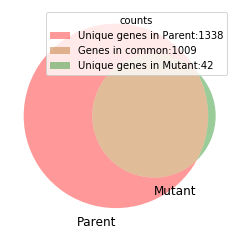

In [13]:
# library
#pip install matplotlib-venn
from collections import Counter

import matplotlib.pyplot as plt
#%matplotlib inline

from matplotlib_venn import venn2, venn3
setLabels=("Parent", "Mutant")
setLabels_legend={'10': "Unique genes in Parent","01": "Unique genes in Mutant","11":"Genes in common"}
sets = Counter()
sets['10'] = sum(Tgfa_parent_DEG)-sum(Tgfa_parent_DEG&Tgfa_mutant_DEG)
sets['11']  = sum(Tgfa_parent_DEG&Tgfa_mutant_DEG)
sets['01'] = sum(Tgfa_mutant_DEG)-sum(Tgfa_parent_DEG&Tgfa_mutant_DEG)

ax = plt.gca()

v = venn2(subsets = sets, set_labels = setLabels, ax = ax)


h, l = [],[]
for i in sets:
    v.get_label_by_id(i).set_text("")
    h.append(v.get_patch_by_id(i))
    l.append(setLabels_legend[i] +":"+ str(sets[i]))
    
ax.legend(handles=h, labels=l, title="counts", loc='upper right')



plt.rcParams["figure.figsize"]=5,5

plt.show()

In [14]:
sum(Tgfa_parent_DEG)

2347

In [15]:
sum(Tgfa_mutant_DEG)

1051

 What genes change increasing in TGFA mut and decreasing in parent, and vice versa.

In [16]:
DEG_mouse

,Tgfa_parent_baseMean,Tgfa_parent_log2FoldChange,Tgfa_parent_lfcSE,Tgfa_parent_stat,Tgfa_parent_pvalue,Tgfa_parent_padj,Tgfa_mut_baseMean,Tgfa_mut_log2FoldChange,Tgfa_mut_lfcSE,Tgfa_mut_stat,Tgfa_mut_pvalue,Tgfa_mut_padj
XKR4,31.315347,-2.824516,0.336447,-8.221071,2.016935e-16,1.143829e-15,19.208375,-1.533961,0.313791,-4.792547,0.000002,0.000010
RP1,27.000214,1.956008,0.332499,5.810778,6.218302e-09,2.097992e-08,25.633864,1.076782,0.296235,3.613506,0.000302,0.001142
SOX17,424.687645,0.515093,0.084360,6.105536,1.024563e-09,3.668974e-09,353.385653,0.293326,0.105436,2.781847,0.005405,0.014639
RNU6-840P,1.597520,-0.843336,0.654834,-1.264456,2.060666e-01,2.661396e-01,2.102350,-0.334465,0.347443,-0.954931,0.339612,0.461353
MRPL15,2203.619488,0.606861,0.063870,9.501402,2.070827e-21,1.541528e-20,1894.011264,0.233964,0.068922,3.394619,0.000687,0.002367
...,...,...,...,...,...,...,...,...,...,...,...,...
SP100,0.553695,-0.384064,0.445486,-0.841678,3.999684e-01,4.735761e-01,0.236131,-0.064247,0.156035,-0.400665,0.688667,NaN
CCL21,3.318267,-0.253982,0.630266,-0.402175,6.875554e-01,7.409092e-01,2.426511,0.077170,0.329026,0.235708,0.813659,0.873388
CCL27,0.257400,-0.217778,0.426822,-0.499917,6.171335e-01,NaN,0.773664,0.134172,0.271833,0.510158,0.609941,NaN
CCL19,1.676218,0.561383,0.628797,0.905534,3.651826e-01,4.378416e-01,0.601007,-0.170586,0.208724,-0.725162,0.468353,NaN


In [17]:
temp1= (DEG_mouse["Tgfa_parent_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_parent_baseMean"]>50)
temp3=(DEG_mouse["Tgfa_parent_log2FoldChange"]>0)
Tgfa_parent_DEG2=temp1 & temp2 & temp3

temp1= (DEG_mouse["Tgfa_mut_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_mut_baseMean"]>50)
temp3=(DEG_mouse["Tgfa_mut_log2FoldChange"]<0)
Tgfa_mutant_DEG2=temp1 & temp2 & temp3

In [18]:
print(sum((Tgfa_mutant_DEG2) & (Tgfa_parent_DEG2)))
print(DEG_mouse.index[(Tgfa_mutant_DEG2) & (Tgfa_parent_DEG2)])

17
Index(['DPP7', 'HMCN2', 'SCG5', 'GLMP', 'PKLR', 'TYW3', 'COQ3', 'ANGPTL3',
       'SESN2', 'CIT', 'AACS', 'FUCA2', 'BTBD11', 'PPM1H', 'KCNK5', 'H4C2',
       'ETV5'],
      dtype='object')


In [19]:
DEG_mouse[(Tgfa_mutant_DEG2) & (Tgfa_parent_DEG2)]

,Tgfa_parent_baseMean,Tgfa_parent_log2FoldChange,Tgfa_parent_lfcSE,Tgfa_parent_stat,Tgfa_parent_pvalue,Tgfa_parent_padj,Tgfa_mut_baseMean,Tgfa_mut_log2FoldChange,Tgfa_mut_lfcSE,Tgfa_mut_stat,Tgfa_mut_pvalue,Tgfa_mut_padj
DPP7,2371.227043,0.289990,0.112621,2.574927,0.010026,0.017060,2221.786010,-0.351593,0.055317,-6.355900,2.072098e-10,2.106961e-09
HMCN2,317.372419,0.462610,0.161895,2.857412,0.004271,0.007708,350.520167,-0.801775,0.159750,-5.018052,5.219800e-07,3.319235e-06
SCG5,893.400419,0.382414,0.131932,2.898559,0.003749,0.006822,932.932809,-0.421597,0.092042,-4.580336,4.642306e-06,2.510060e-05
GLMP,4487.272213,0.264890,0.086852,3.049879,0.002289,0.004288,3819.665931,-0.148823,0.061798,-2.408223,1.603041e-02,3.752198e-02
PKLR,1199.272637,0.297542,0.101913,2.919542,0.003505,0.006405,1250.286118,-0.429668,0.122961,-3.494340,4.752356e-04,1.706885e-03
TYW3,1971.129314,0.703144,0.155349,4.526159,0.000006,0.000015,2128.984262,-0.460902,0.152731,-3.017723,2.546814e-03,7.549771e-03
COQ3,802.801766,0.243198,0.099252,2.450296,0.014274,0.023675,663.939981,-0.264752,0.089932,-2.943908,3.240962e-03,9.343245e-03
ANGPTL3,1412.226013,0.338137,0.125542,2.693414,0.007072,0.012339,1502.858917,-0.475783,0.114532,-4.154141,3.265118e-05,1.502997e-04
SESN2,2166.185784,0.503371,0.110296,4.563805,0.000005,0.000013,1670.484930,-0.237216,0.083814,-2.830274,4.650818e-03,1.282312e-02
CIT,556.723660,0.509059,0.132985,3.827795,0.000129,0.000286,491.557394,-0.337021,0.144176,-2.337519,1.941219e-02,4.403662e-02


In [20]:
temp1= (DEG_mouse["Tgfa_parent_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_parent_baseMean"]>50)
temp3=(DEG_mouse["Tgfa_parent_log2FoldChange"]<0)
Tgfa_parent_DEG2=temp1 & temp2 & temp3

temp1= (DEG_mouse["Tgfa_mut_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_mut_baseMean"]>50)
temp3=(DEG_mouse["Tgfa_mut_log2FoldChange"]>0)
Tgfa_mutant_DEG2=temp1 & temp2 & temp3

In [21]:
print(sum((Tgfa_mutant_DEG2) & (Tgfa_parent_DEG2)))
print(DEG_mouse.index[(Tgfa_mutant_DEG2) & (Tgfa_parent_DEG2)])

18
Index(['INO80D', 'CAMSAP1', 'BAZ2B', 'CTDSPL2', 'ARID1A', 'VGLL4', 'BHLHE41',
       'KMT2B', 'OTUD4', 'MAP3K21', 'IL17RB', 'KMT2A', 'NCBP3', 'MBTD1',
       'BPTF', 'FOXN3', 'BTBD7', 'JAK2'],
      dtype='object')


In [22]:
DEG_mouse[(Tgfa_mutant_DEG2) & (Tgfa_parent_DEG2)]

,Tgfa_parent_baseMean,Tgfa_parent_log2FoldChange,Tgfa_parent_lfcSE,Tgfa_parent_stat,Tgfa_parent_pvalue,Tgfa_parent_padj,Tgfa_mut_baseMean,Tgfa_mut_log2FoldChange,Tgfa_mut_lfcSE,Tgfa_mut_stat,Tgfa_mut_pvalue,Tgfa_mut_padj
INO80D,2521.285742,-0.166764,0.075138,-2.219423,2.645795e-02,4.182733e-02,1974.090026,0.193392,0.071998,2.686061,7.229997e-03,1.883058e-02
CAMSAP1,1227.327203,-0.153903,0.056103,-2.743239,6.083645e-03,1.072189e-02,953.534108,0.209009,0.070880,2.948743,3.190690e-03,9.219089e-03
BAZ2B,2323.085647,-0.139351,0.059660,-2.335755,1.950402e-02,3.157181e-02,1884.968532,0.157235,0.059531,2.641218,8.260859e-03,2.113945e-02
CTDSPL2,1376.617119,-0.202159,0.089802,-2.251152,2.437588e-02,3.878057e-02,1045.763425,0.164835,0.066799,2.467622,1.360138e-02,3.253911e-02
ARID1A,4061.694408,-0.171023,0.071257,-2.400076,1.639165e-02,2.691126e-02,3198.810602,0.122174,0.041551,2.940313,3.278810e-03,9.437835e-03
VGLL4,1847.803890,-0.235461,0.059477,-3.958837,7.531565e-05,1.714322e-04,1331.078379,0.143507,0.060854,2.358184,1.836457e-02,4.202148e-02
BHLHE41,276.363262,-0.403270,0.133213,-3.027275,2.467692e-03,4.601666e-03,188.425770,0.640333,0.183545,3.487692,4.872084e-04,1.744036e-03
KMT2B,2555.414136,-0.155378,0.065950,-2.355997,1.847306e-02,3.002996e-02,1974.567079,0.157400,0.060002,2.623248,8.709578e-03,2.214405e-02
OTUD4,3865.448332,-0.132964,0.061282,-2.169707,3.002907e-02,4.698226e-02,3120.120555,0.182017,0.047435,3.837163,1.244639e-04,5.098294e-04
MAP3K21,732.873104,-0.255227,0.083638,-3.051560,2.276558e-03,4.266541e-03,528.323704,0.204366,0.076924,2.656704,7.890870e-03,2.032452e-02


----

# Read the main data file

In [23]:
#only DEG in normal mice after Nx , but not in mut mice after Nx
selected_Genes= DEG_mouse.index[Tgfa_parent_DEG & ~Tgfa_mutant_DEG].tolist()

# DEG in either normal mice after Nx or in mut mice after Nx, but not in both
#selected_Genes= DEG_mouse.index[Tgfa_parent_DEG & Tgfa_mutant_DEG].tolist()

In [24]:
temp1=sig_info["cell_id"] == "HA1E"
temp2=sig_info["pert_itime"] == "24 h"
HA1E_ids = sig_info["sig_id"][ temp1& temp2 ]

selected_genes_ids =  [ x in selected_Genes for x in list(gene_info["pr_gene_symbol"])]
selected_genes_ids = list(gene_info[selected_genes_ids]["pr_gene_id"])

Tgfa_mouse_gctoo = parse(data_file_lvl5, cid=HA1E_ids, rid=selected_genes_ids)

In [25]:
Tgfa_mouse_gctoo.data_df

cid,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,CPC001_HA1E_24H:BRD-K87991767-001-02-0:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
rid,,,,,,,,,,,,,,,,,,,,,
1950,-0.033067,0.080542,0.854567,-0.327455,0.044007,-0.196267,1.115680,0.138313,1.897792,0.139022,...,10.0000,10.0000,10.0000,10.0000,3.03250,1.5546,-1.7100,3.4544,6.2276,2.8729
4776,0.206633,0.341061,0.586433,0.073738,0.155655,0.586700,-0.883745,0.086939,-2.319941,0.357485,...,10.0000,3.7744,0.7482,10.0000,0.22390,-1.1191,0.3067,1.2316,-0.4178,-1.3631
3315,-0.140300,0.594652,0.087200,0.424472,0.050928,-0.519133,0.390514,-0.020664,-3.679225,0.448004,...,-1.3322,-1.3067,-3.0008,-9.5916,-2.98325,-0.8634,-0.7317,-1.5454,-1.9709,-0.3756
6774,-0.138933,-0.303212,1.022933,-0.810232,0.734999,-0.218300,-0.520071,1.057253,2.011937,-0.206979,...,-1.9212,-2.3572,-3.0029,-1.7194,1.37930,2.3321,-1.9915,-0.8027,-0.9159,-0.9718
5627,0.178533,0.476983,0.886500,-0.595452,0.998136,0.402333,0.669477,0.928828,-1.803730,-0.310000,...,-0.9553,0.6391,-1.8728,8.9924,-0.13120,10.0000,2.2301,2.6250,0.8957,2.4689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,-0.279400,0.633251,0.783667,-0.201995,-0.280378,0.392500,0.601703,-0.786787,1.496363,1.056694,...,9.4751,7.2821,6.8879,7.8201,5.44150,1.1566,2.1111,1.2727,1.0511,1.1250
219699,0.708333,-0.189710,-0.263700,-0.007961,-0.797074,0.235067,0.526634,0.262092,0.308785,0.654042,...,7.2349,1.4393,5.4203,4.9206,3.05400,0.2521,2.5346,0.6034,-0.6005,-0.2825
27147,-0.140567,-0.033477,0.359833,-0.264203,-0.822399,0.251367,-0.077965,-0.568759,0.167567,-0.930128,...,6.1157,3.5485,7.2972,5.4631,1.59805,1.6513,0.2735,0.4916,1.6264,1.2935


In [26]:
Tgfa_mouse_gctoo_temp=Tgfa_mouse_gctoo.data_df
#Tgfa_mouse_gctoo=Tgfa_mouse_gctoo_temp

In [27]:
# rename gene-ids into gene symbols
x=[]
for i in list(Tgfa_mouse_gctoo.data_df.index):
    x.append( gene_info.loc[gene_info["pr_gene_id"]==i ,"pr_gene_symbol"].to_string().split("    ")[1])

Tgfa_mouse_gctoo.data_df.index=x
Tgfa_mouse_gctoo.data_df

cid,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,CPC001_HA1E_24H:BRD-K87991767-001-02-0:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
EGF,-0.033067,0.080542,0.854567,-0.327455,0.044007,-0.196267,1.115680,0.138313,1.897792,0.139022,...,10.0000,10.0000,10.0000,10.0000,3.03250,1.5546,-1.7100,3.4544,6.2276,2.8729
NFATC4,0.206633,0.341061,0.586433,0.073738,0.155655,0.586700,-0.883745,0.086939,-2.319941,0.357485,...,10.0000,3.7744,0.7482,10.0000,0.22390,-1.1191,0.3067,1.2316,-0.4178,-1.3631
HSPB1,-0.140300,0.594652,0.087200,0.424472,0.050928,-0.519133,0.390514,-0.020664,-3.679225,0.448004,...,-1.3322,-1.3067,-3.0008,-9.5916,-2.98325,-0.8634,-0.7317,-1.5454,-1.9709,-0.3756
STAT3,-0.138933,-0.303212,1.022933,-0.810232,0.734999,-0.218300,-0.520071,1.057253,2.011937,-0.206979,...,-1.9212,-2.3572,-3.0029,-1.7194,1.37930,2.3321,-1.9915,-0.8027,-0.9159,-0.9718
PROS1,0.178533,0.476983,0.886500,-0.595452,0.998136,0.402333,0.669477,0.928828,-1.803730,-0.310000,...,-0.9553,0.6391,-1.8728,8.9924,-0.13120,10.0000,2.2301,2.6250,0.8957,2.4689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-0.279400,0.633251,0.783667,-0.201995,-0.280378,0.392500,0.601703,-0.786787,1.496363,1.056694,...,9.4751,7.2821,6.8879,7.8201,5.44150,1.1566,2.1111,1.2727,1.0511,1.1250
UNC5B,0.708333,-0.189710,-0.263700,-0.007961,-0.797074,0.235067,0.526634,0.262092,0.308785,0.654042,...,7.2349,1.4393,5.4203,4.9206,3.05400,0.2521,2.5346,0.6034,-0.6005,-0.2825
DENND2A,-0.140567,-0.033477,0.359833,-0.264203,-0.822399,0.251367,-0.077965,-0.568759,0.167567,-0.930128,...,6.1157,3.5485,7.2972,5.4631,1.59805,1.6513,0.2735,0.4916,1.6264,1.2935
CALHM2,0.753200,-0.514996,-0.223367,-0.668027,0.109918,0.570533,-1.288179,-0.648970,-4.672332,0.524914,...,3.1572,2.0891,3.2950,0.7055,1.54840,-2.1393,-0.3357,0.2499,0.7969,0.5850


In [28]:
gene_info.loc[gene_info["pr_gene_id"]=="60" ]

,pr_gene_id,pr_gene_symbol,pr_gene_title,pr_is_lm,pr_is_bing
12327,60,ACTB,"actin, beta",0,1


### Save sliced data

The sliced data can be saved in a smaller file in *gtcx* or *gct* format 

In [29]:
import cmapPy.pandasGEXpress.write_gct as wg
# write GCToo instance to .gct
wg.write(Tgfa_mouse_gctoo, "HA1E")

In [30]:
Tgfa_mouse_gctoo.data_df

cid,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,CPC001_HA1E_24H:BRD-K87991767-001-02-0:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
EGF,-0.033067,0.080542,0.854567,-0.327455,0.044007,-0.196267,1.115680,0.138313,1.897792,0.139022,...,10.0000,10.0000,10.0000,10.0000,3.03250,1.5546,-1.7100,3.4544,6.2276,2.8729
NFATC4,0.206633,0.341061,0.586433,0.073738,0.155655,0.586700,-0.883745,0.086939,-2.319941,0.357485,...,10.0000,3.7744,0.7482,10.0000,0.22390,-1.1191,0.3067,1.2316,-0.4178,-1.3631
HSPB1,-0.140300,0.594652,0.087200,0.424472,0.050928,-0.519133,0.390514,-0.020664,-3.679225,0.448004,...,-1.3322,-1.3067,-3.0008,-9.5916,-2.98325,-0.8634,-0.7317,-1.5454,-1.9709,-0.3756
STAT3,-0.138933,-0.303212,1.022933,-0.810232,0.734999,-0.218300,-0.520071,1.057253,2.011937,-0.206979,...,-1.9212,-2.3572,-3.0029,-1.7194,1.37930,2.3321,-1.9915,-0.8027,-0.9159,-0.9718
PROS1,0.178533,0.476983,0.886500,-0.595452,0.998136,0.402333,0.669477,0.928828,-1.803730,-0.310000,...,-0.9553,0.6391,-1.8728,8.9924,-0.13120,10.0000,2.2301,2.6250,0.8957,2.4689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-0.279400,0.633251,0.783667,-0.201995,-0.280378,0.392500,0.601703,-0.786787,1.496363,1.056694,...,9.4751,7.2821,6.8879,7.8201,5.44150,1.1566,2.1111,1.2727,1.0511,1.1250
UNC5B,0.708333,-0.189710,-0.263700,-0.007961,-0.797074,0.235067,0.526634,0.262092,0.308785,0.654042,...,7.2349,1.4393,5.4203,4.9206,3.05400,0.2521,2.5346,0.6034,-0.6005,-0.2825
DENND2A,-0.140567,-0.033477,0.359833,-0.264203,-0.822399,0.251367,-0.077965,-0.568759,0.167567,-0.930128,...,6.1157,3.5485,7.2972,5.4631,1.59805,1.6513,0.2735,0.4916,1.6264,1.2935
CALHM2,0.753200,-0.514996,-0.223367,-0.668027,0.109918,0.570533,-1.288179,-0.648970,-4.672332,0.524914,...,3.1572,2.0891,3.2950,0.7055,1.54840,-2.1393,-0.3357,0.2499,0.7969,0.5850


### annotate HA1E_ids_info with its corresponding sample annotations


In [31]:
temp1=sig_info["cell_id"] == "HA1E"
temp2=sig_info["pert_itime"] == "24 h"
HA1E_ids_info = sig_info[ temp1& temp2 ]
HA1E_ids_info.set_index("sig_id", inplace=True)
# annotate belinostat_a375_gctoo with its corresponding sample annotations
Tgfa_mouse_gctoo.col_metadata_df = HA1E_ids_info.copy()


In [32]:
Tgfa_mouse_gctoo.data_df.mean(axis = 0)

cid
CPC002_HA1E_24H:BRD-K26548821-001-01-8:10    -0.107984
CPC005_HA1E_24H:BRD-A85280935-003-01-7:10     0.085492
CPC005_HA1E_24H:BRD-A07824748-001-02-6:10    -0.059402
CPC001_HA1E_24H:BRD-A95445494-001-02-9:10    -0.046111
CPC001_HA1E_24H:BRD-K05906022-001-02-8:10    -0.243103
                                                ...   
PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10    0.828944
PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10    1.029582
PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10    0.838926
PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10    0.827811
PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10    0.487330
Length: 3911, dtype: float32

#### Test correlation of the samples

In [33]:
Tgfa_mouse_gctoo_cors = Tgfa_mouse_gctoo.data_df.corr()
Tgfa_mouse_gctoo_cors[0:5] #only showing first 5 rows

cid,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,CPC001_HA1E_24H:BRD-K87991767-001-02-0:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
cid,,,,,,,,,,,,,,,,,,,,,
CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,1.000000,-0.068133,-0.026361,0.107161,0.107018,0.193448,0.076139,0.162125,-0.034400,0.038703,...,-0.212457,-0.218170,-0.188461,-0.140662,-0.152937,-0.099306,-0.061176,-0.074823,-0.075257,-0.096541
CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,-0.068133,1.000000,-0.073684,-0.062507,-0.146766,-0.020593,-0.024060,-0.094239,-0.013555,0.036390,...,0.160313,0.152648,0.091031,0.095968,0.110371,0.035704,0.085574,0.014773,-0.018568,-0.031349
CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,-0.026361,-0.073684,1.000000,0.027322,0.069538,-0.050260,-0.035429,0.176348,0.078757,0.065762,...,0.002297,0.044897,-0.028342,0.007963,-0.008346,0.045485,-0.056630,0.038446,-0.054440,0.049996
CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,0.107161,-0.062507,0.027322,1.000000,0.131406,0.000032,0.059301,-0.103234,0.032511,-0.042592,...,-0.081078,-0.111941,-0.048337,-0.017579,-0.047476,0.037877,-0.013593,-0.106880,0.007158,-0.030111
CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,0.107018,-0.146766,0.069538,0.131406,1.000000,-0.054659,0.309807,0.250533,-0.083736,-0.136057,...,-0.452219,-0.445378,-0.467453,-0.414672,-0.434771,0.022584,-0.098374,-0.146149,-0.191114,-0.212451


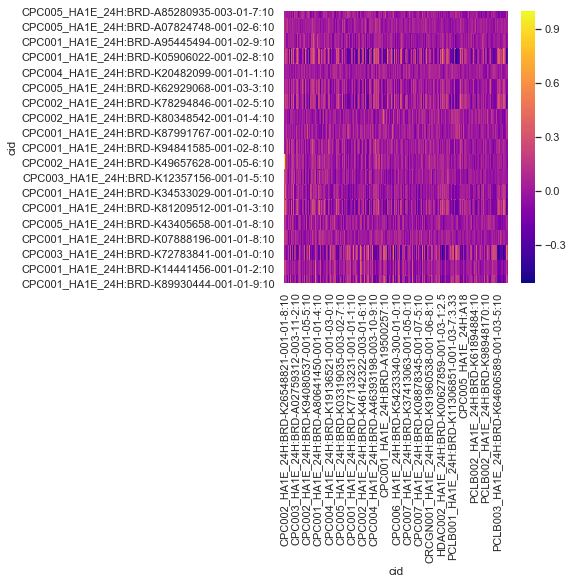

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


sns.heatmap(Tgfa_mouse_gctoo_cors[1:20], cmap='plasma')
plt.show()

----

# Convert to ternary/ semi-binary data

Significant changes are converted into 3 values, I call semi-binary system as it uses "1", "0" and "-1". <br>  
For non-significant changes, the value is **0**. While increased genes have a value of **+1**, and decreased genes have **-1**.<br> <br>
This will allow comparing RNA-Seq to L1000 with less bias... In theory! <br>
In reality we need to upload all the genes so it works. We uploaded ony the DEG from the gctx file!, so the zero is not a real value. Still...

#### Convert RNA-Seq to semi-binary

Get genes changing in parent but not in mutant. The change cutoff is at least 50% or log2FC <mo>&PlusMinus;</mo> 0.58

In [35]:
temp1= (DEG_mouse["Tgfa_parent_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_parent_baseMean"]>50)
temp3=(DEG_mouse["Tgfa_parent_log2FoldChange"]<(-0.58)) | (DEG_mouse["Tgfa_parent_log2FoldChange"]>(+0.58))
Tgfa_parent_DEG2=temp1 & temp2 & temp3

temp1= (DEG_mouse["Tgfa_mut_padj"]<0.05) 
temp2=(DEG_mouse["Tgfa_mut_baseMean"]>50)
temp3= (DEG_mouse["Tgfa_mut_log2FoldChange"]<(-0.58)) | (DEG_mouse["Tgfa_mut_log2FoldChange"]>(+0.58))
Tgfa_mutant_DEG2=temp1 & temp2 & temp3

print(sum(Tgfa_parent_DEG2))
print(sum(Tgfa_mutant_DEG2))
print(sum(Tgfa_parent_DEG2 & ~Tgfa_mutant_DEG2))
print(sum(Tgfa_parent_DEG2 & Tgfa_mutant_DEG2))
#sb_DEG_mouse

4138
2062
2186
1952


In [36]:
DEG_mouse

,Tgfa_parent_baseMean,Tgfa_parent_log2FoldChange,Tgfa_parent_lfcSE,Tgfa_parent_stat,Tgfa_parent_pvalue,Tgfa_parent_padj,Tgfa_mut_baseMean,Tgfa_mut_log2FoldChange,Tgfa_mut_lfcSE,Tgfa_mut_stat,Tgfa_mut_pvalue,Tgfa_mut_padj
XKR4,31.315347,-2.824516,0.336447,-8.221071,2.016935e-16,1.143829e-15,19.208375,-1.533961,0.313791,-4.792547,0.000002,0.000010
RP1,27.000214,1.956008,0.332499,5.810778,6.218302e-09,2.097992e-08,25.633864,1.076782,0.296235,3.613506,0.000302,0.001142
SOX17,424.687645,0.515093,0.084360,6.105536,1.024563e-09,3.668974e-09,353.385653,0.293326,0.105436,2.781847,0.005405,0.014639
RNU6-840P,1.597520,-0.843336,0.654834,-1.264456,2.060666e-01,2.661396e-01,2.102350,-0.334465,0.347443,-0.954931,0.339612,0.461353
MRPL15,2203.619488,0.606861,0.063870,9.501402,2.070827e-21,1.541528e-20,1894.011264,0.233964,0.068922,3.394619,0.000687,0.002367
...,...,...,...,...,...,...,...,...,...,...,...,...
SP100,0.553695,-0.384064,0.445486,-0.841678,3.999684e-01,4.735761e-01,0.236131,-0.064247,0.156035,-0.400665,0.688667,NaN
CCL21,3.318267,-0.253982,0.630266,-0.402175,6.875554e-01,7.409092e-01,2.426511,0.077170,0.329026,0.235708,0.813659,0.873388
CCL27,0.257400,-0.217778,0.426822,-0.499917,6.171335e-01,NaN,0.773664,0.134172,0.271833,0.510158,0.609941,NaN
CCL19,1.676218,0.561383,0.628797,0.905534,3.651826e-01,4.378416e-01,0.601007,-0.170586,0.208724,-0.725162,0.468353,NaN


In [37]:
import numpy as np

sb_DEG_mouse= np.repeat(0,len(Tgfa_mutant_DEG2))
#sb_DEG_mouse[DEG_mouse["Tgfa_parent_log2FoldChange"]<(-0.58)]=(-1)
#sb_DEG_mouse[DEG_mouse["Tgfa_parent_log2FoldChange"]>(0.58)]=(1)
sb_DEG_mouse[DEG_mouse["Tgfa_parent_log2FoldChange"]<(-1*Fc_RNA_cutoff)]=(-1)
sb_DEG_mouse[DEG_mouse["Tgfa_parent_log2FoldChange"]>(Fc_RNA_cutoff)]=(1)
sb_DEG_mouse=list(sb_DEG_mouse)
sb_DEG_mouse=pd.DataFrame(sb_DEG_mouse, index= DEG_mouse.index, columns=["MOUSE"])
sb_DEG_mouse

,MOUSE
XKR4,-1
RP1,1
SOX17,0
RNU6-840P,-1
MRPL15,0
...,...
SP100,0
CCL21,0
CCL27,0
CCL19,0


In [38]:
from collections import Counter

Counter(sb_DEG_mouse["MOUSE"])

Counter({-1: 3127, 1: 1295, 0: 13148})

In [39]:
len(selected_genes_ids)

sum(sb_DEG_mouse["MOUSE"].abs()>0)

4422

In [40]:
DEG_mouse[Tgfa_mutant_DEG2]

,Tgfa_parent_baseMean,Tgfa_parent_log2FoldChange,Tgfa_parent_lfcSE,Tgfa_parent_stat,Tgfa_parent_pvalue,Tgfa_parent_padj,Tgfa_mut_baseMean,Tgfa_mut_log2FoldChange,Tgfa_mut_lfcSE,Tgfa_mut_stat,Tgfa_mut_pvalue,Tgfa_mut_padj
TCF24,1441.016871,-0.695853,0.110956,-6.271409,3.577949e-10,1.330139e-09,1240.727185,-0.854662,0.082152,-10.402701,2.410024e-25,1.135894e-23
SULF1,705.088320,-2.199420,0.225710,-9.741369,2.008303e-22,1.572569e-21,311.320097,-1.337556,0.198343,-6.738871,1.596225e-11,1.917004e-10
LY96,190.416762,-0.840277,0.119303,-7.042517,1.887975e-12,8.224904e-12,131.825960,-0.808310,0.131556,-6.139650,8.270336e-10,7.810699e-09
PI15,508.420772,-1.157321,0.120061,-9.638532,5.496824e-22,4.224102e-21,340.437263,-1.016000,0.134258,-7.564624,3.889891e-14,6.344036e-13
MCM3,525.212446,-2.048535,0.117754,-17.389738,9.868473e-68,4.462711e-66,335.387984,-1.554084,0.190235,-8.161067,3.320770e-16,6.698749e-15
...,...,...,...,...,...,...,...,...,...,...,...,...
GPAM,3145.335061,0.684100,0.067235,10.174649,2.573259e-24,2.237096e-23,2495.403249,0.598238,0.106709,5.606136,2.068937e-08,1.622670e-07
VWA2,1280.587434,1.212399,0.093893,12.911637,3.869840e-38,6.171293e-37,1094.415384,1.210014,0.102110,11.847745,2.210605e-32,1.762370e-30
PNLIPRP1,5576.530604,-2.438159,0.653047,-6.503569,7.843651e-11,3.070156e-10,336.197395,-1.311954,0.359728,-4.986838,6.137559e-07,3.847333e-06
SHTN1,1166.887394,-1.231759,0.071659,-17.188333,3.247361e-66,1.396099e-64,768.523716,-0.914559,0.076166,-12.005467,3.325817e-33,2.816234e-31


#### Convert L1000 to semi-binary

This is tricky. Mainly because L1000 is based on plates, and each plate has a DMSO sample as contro. Previousely we found that DMSO samples for the same cell-line differ from plate to another. And the triplicate DMSO have major diffeences sometimes. This means, each sample needs to be compared to the DMSO on its plate.<br> <br>
The dish has 376 wells with 15-17 DMSO samples.

In [41]:
sample_names=HA1E_ids_info["distil_id"]

In [42]:
dish_names=[]
for i in sample_names:
    dish_names.append(i.split("_")[0])

In [43]:
dish_names

['CPC003',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',
 'CPC001',

In [44]:
HA1E_ids_info["dish_name"]=dish_names

/home/ros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
HA1E_ids_info

,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id,dish_name
sig_id,,,,,,,,,,,,
CNS001_HA1E_24H:DMSO:0.1,CNS001-DMSO,DMSO,ctl_vehicle.cns,HA1E,0.1,%,0.1 %,24,h,24 h,CPC003_HA1E_24H:DMSO:-666|CPC004_HA1E_24H:DMSO...,CPC003
CPC001_HA1E_24H:A17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC001_H...,CPC001
CPC001_HA1E_24H:B17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:B17|CPC001_H...,CPC001
CPC001_HA1E_24H:B18,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X2_B3_DUO52HI53LO:B18,CPC001
CPC001_HA1E_24H:BRD-A00267231-001-01-1:10,BRD-A00267231,hemado,trt_cp,HA1E,10,µM,10 µM,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:N03|CPC001_H...,CPC001
...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB003_HA1E_24H:BRD-K98109757-001-01-0:0.37,BRD-K98109757,cyclopentene,trt_cp,HA1E,0.37,µM,0.37 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:M22|PCLB003_HA1E_24H_X...,PCLB003
PCLB003_HA1E_24H:BRD-K98109757-001-01-0:1.11,BRD-K98109757,cyclopentene,trt_cp,HA1E,1.11,µM,1.11 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:M21|PCLB003_HA1E_24H_X...,PCLB003
PCLB003_HA1E_24H:BRD-K98109757-001-01-0:10,BRD-K98109757,cyclopentene,trt_cp,HA1E,10,µM,10 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:M19|PCLB003_HA1E_24H_X...,PCLB003


In [46]:
DMSO_data=HA1E_ids_info[HA1E_ids_info["pert_id"]=="DMSO"]
Tgfa_mouse_gctoo.col_metadata_df = HA1E_ids_info.copy()


In [47]:
DMSO_data

,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id,dish_name
sig_id,,,,,,,,,,,,
CPC001_HA1E_24H:A17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC001_H...,CPC001
CPC001_HA1E_24H:B17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:B17|CPC001_H...,CPC001
CPC001_HA1E_24H:B18,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X2_B3_DUO52HI53LO:B18,CPC001
CPC001_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC001_H...,CPC001
CPC001_HA1E_24H:E05,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X3_B3_DUO52HI53LO:E05,CPC001
...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB001_HA1E_24H:O06,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,PCLB001_HA1E_24H_X1_F2B6_DUO52HI53LO:O06|PCLB0...,PCLB001
PCLB001_HA1E_24H:P05,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,PCLB001_HA1E_24H_X2_B12:P05|PCLB001_HA1E_24H_X...,PCLB001
PCLB001_HA1E_24H:P06,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,PCLB001_HA1E_24H_X3_F2B6_DUO52HI53LO:P06,PCLB001


In [48]:
Counter(DMSO_data["dish_name"])

Counter({'CPC001': 16,
         'CPC002': 15,
         'CPC003': 16,
         'CPC004': 17,
         'CPC005': 16,
         'CPC006': 15,
         'CPC007': 25,
         'CRCGN001': 18,
         'CRCGN004': 19,
         'HDAC002': 29,
         'PCLB001': 16,
         'PCLB002': 1,
         'PCLB003': 1})

In [49]:
(Counter(HA1E_ids_info["dish_name"]))

Counter({'CPC003': 376,
         'CPC001': 376,
         'CPC002': 375,
         'CPC004': 374,
         'CPC005': 376,
         'CPC006': 357,
         'CPC007': 372,
         'CRCGN001': 113,
         'CRCGN004': 112,
         'HDAC002': 204,
         'PCLB001': 231,
         'PCLB002': 295,
         'PCLB003': 350})

In [50]:
(Counter(HA1E_ids_info["pert_iname"]))

Counter({'DMSO': 205,
         'hemado': 1,
         '7-hydroxy-PIPAT': 1,
         'ICI-89406': 1,
         'CP-55940': 1,
         'CGP-52432': 1,
         'BRD-A06276885': 1,
         'ipratropium': 3,
         'cilnidipine': 1,
         'nomilin': 1,
         'SKF-81297': 1,
         'norketamine': 1,
         'SB-205607': 1,
         'LY-278584': 1,
         'scopolamine': 3,
         'UB-165': 1,
         'BMY-14802': 1,
         'SDZ-21009': 1,
         'brefeldin-a': 2,
         'trichostatin-a': 21,
         'vinpocetine': 2,
         'geldanamycin': 22,
         'IB-MECA': 2,
         'WAY-213613': 1,
         'naltriben': 1,
         'SB-205384': 1,
         'vinblastine': 4,
         'paclitaxel': 4,
         'BE-2254': 1,
         'isamoltane': 1,
         'diarylpropionitrile': 1,
         'aminomethyltransferase': 1,
         'methyllycaconitine': 1,
         'MRS-1845': 1,
         'CGP-12177': 1,
         'rutin': 2,
         'genistein': 21,
         'cyclosporin-a': 

## Get DMSO samples only

In [51]:

DMSO_gctoo=  Tgfa_mouse_gctoo.data_df[ Tgfa_mouse_gctoo.col_metadata_df.index[(Tgfa_mouse_gctoo.col_metadata_df["pert_id"] =="DMSO")]]

In [52]:
DMSO_gctoo

cid,CPC001_HA1E_24H:DMSO:-666,CPC002_HA1E_24H:DMSO:-666,CPC003_HA1E_24H:DMSO:-666,CPC004_HA1E_24H:DMSO:-666,CPC005_HA1E_24H:DMSO:-666,CPC006_HA1E_24H:DMSO:-666,CPC007_HA1E_24H:DMSO:-666,CRCGN001_HA1E_24H:DMSO:-666,HDAC002_HA1E_24H:DMSO:0.1,CRCGN004_HA1E_24H:DMSO:-666,...,PCLB001_HA1E_24H:D18,PCLB001_HA1E_24H:O06,PCLB001_HA1E_24H:C17,PCLB001_HA1E_24H:D09,PCLB001_HA1E_24H:P05,PCLB001_HA1E_24H:C09,PCLB001_HA1E_24H:O05,PCLB001_HA1E_24H:P06,PCLB002_HA1E_24H:DMSO:-666,PCLB003_HA1E_24H:DMSO:-666
EGF,0.201082,0.546844,0.283142,0.355632,0.304428,0.352665,0.216177,0.629303,-0.130182,-0.077011,...,0.981154,-0.12620,-0.19390,-0.35395,-0.64345,-1.6242,-2.3423,-1.2524,-0.096204,0.225977
NFATC4,0.307935,-0.165293,-0.195903,0.101274,-0.703471,0.113268,0.191480,0.576542,-0.709037,0.177905,...,-0.612749,0.36360,0.33180,0.08940,-0.16900,-0.2401,-0.2124,0.4332,0.418636,0.458170
HSPB1,0.013118,0.326769,0.319199,0.148589,0.135396,0.054254,0.271671,-0.725908,0.378205,0.150752,...,0.225340,0.27555,0.01345,0.10835,-1.23110,1.1708,0.0000,-0.5053,0.025275,-0.390536
STAT3,1.130075,0.959747,0.531261,0.452075,0.533622,0.332000,0.132575,0.406173,0.382325,0.103470,...,0.675702,-0.58210,0.36570,0.08135,-0.53050,0.3846,-1.0138,0.6443,0.252750,-0.164230
PROS1,0.135238,0.566976,0.530074,0.189505,0.361220,-0.047182,-0.319035,-0.534721,0.524029,0.314280,...,0.261528,0.00000,-0.98110,0.25010,-4.98910,-0.2356,0.3731,0.7225,0.086720,-0.731619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-0.186471,-0.497842,-0.478322,-0.722736,-0.229039,-0.381497,-0.148581,-0.154936,-0.695740,-0.156945,...,-0.705661,-0.04500,-0.68410,0.11470,0.48110,0.6788,-0.0765,0.7523,-0.553556,0.449566
UNC5B,-0.143683,-0.177063,-0.573585,-0.446791,-0.132672,-0.330564,0.028819,0.319988,-0.249507,0.211489,...,-1.345229,-0.59510,0.18325,-0.62925,-0.15200,1.6312,-0.2652,-0.0383,-0.733738,0.569563
DENND2A,-0.077600,-0.642211,-0.442792,-0.163752,-0.176894,-0.337216,-0.251801,0.182847,-0.384645,-0.075025,...,-0.350466,0.16320,-1.22510,-0.23505,-0.49570,-0.3650,0.4806,0.5746,-0.382063,0.553525
CALHM2,-0.338650,-0.229400,-0.112435,-0.025924,0.234329,-0.093826,-0.165214,-0.039129,0.071198,0.086855,...,0.397778,-1.29355,-0.27750,0.46985,-0.66165,0.5349,1.1411,-1.4631,-0.068835,-0.263413


In [53]:
from sklearn.decomposition import PCA
pca_DMSO = PCA(n_components=2)
principalComponents_DMSO = pca_DMSO.fit_transform(DMSO_gctoo.transpose())
principalComponents_DMSO = pd.DataFrame(data = principalComponents_DMSO
             , columns = ['principal component 1', 'principal component 2'])

In [54]:

targets = list(Tgfa_mouse_gctoo.col_metadata_df[(Tgfa_mouse_gctoo.col_metadata_df["pert_id"] =="DMSO")]["dish_name"])

#plot

groups= Tgfa_mouse_gctoo.col_metadata_df[(Tgfa_mouse_gctoo.col_metadata_df["pert_id"] =="DMSO")].groupby("dish_name")



groups=principalComponents_DMSO
groups["dishname"]=list(Tgfa_mouse_gctoo.col_metadata_df[(Tgfa_mouse_gctoo.col_metadata_df["pert_id"] =="DMSO")]["dish_name"])


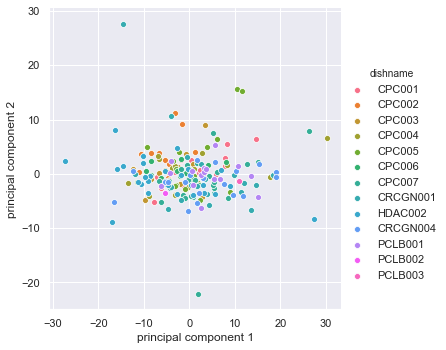

In [55]:
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 50,50

%matplotlib inline

sns.pairplot(x_vars= 'principal component 1',
             y_vars='principal component 2',
             data=groups, hue="dishname", height=5)


# Making the averages for DMSO in each plate


In [56]:
DMSO_gctoo

cid,CPC001_HA1E_24H:DMSO:-666,CPC002_HA1E_24H:DMSO:-666,CPC003_HA1E_24H:DMSO:-666,CPC004_HA1E_24H:DMSO:-666,CPC005_HA1E_24H:DMSO:-666,CPC006_HA1E_24H:DMSO:-666,CPC007_HA1E_24H:DMSO:-666,CRCGN001_HA1E_24H:DMSO:-666,HDAC002_HA1E_24H:DMSO:0.1,CRCGN004_HA1E_24H:DMSO:-666,...,PCLB001_HA1E_24H:D18,PCLB001_HA1E_24H:O06,PCLB001_HA1E_24H:C17,PCLB001_HA1E_24H:D09,PCLB001_HA1E_24H:P05,PCLB001_HA1E_24H:C09,PCLB001_HA1E_24H:O05,PCLB001_HA1E_24H:P06,PCLB002_HA1E_24H:DMSO:-666,PCLB003_HA1E_24H:DMSO:-666
EGF,0.201082,0.546844,0.283142,0.355632,0.304428,0.352665,0.216177,0.629303,-0.130182,-0.077011,...,0.981154,-0.12620,-0.19390,-0.35395,-0.64345,-1.6242,-2.3423,-1.2524,-0.096204,0.225977
NFATC4,0.307935,-0.165293,-0.195903,0.101274,-0.703471,0.113268,0.191480,0.576542,-0.709037,0.177905,...,-0.612749,0.36360,0.33180,0.08940,-0.16900,-0.2401,-0.2124,0.4332,0.418636,0.458170
HSPB1,0.013118,0.326769,0.319199,0.148589,0.135396,0.054254,0.271671,-0.725908,0.378205,0.150752,...,0.225340,0.27555,0.01345,0.10835,-1.23110,1.1708,0.0000,-0.5053,0.025275,-0.390536
STAT3,1.130075,0.959747,0.531261,0.452075,0.533622,0.332000,0.132575,0.406173,0.382325,0.103470,...,0.675702,-0.58210,0.36570,0.08135,-0.53050,0.3846,-1.0138,0.6443,0.252750,-0.164230
PROS1,0.135238,0.566976,0.530074,0.189505,0.361220,-0.047182,-0.319035,-0.534721,0.524029,0.314280,...,0.261528,0.00000,-0.98110,0.25010,-4.98910,-0.2356,0.3731,0.7225,0.086720,-0.731619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-0.186471,-0.497842,-0.478322,-0.722736,-0.229039,-0.381497,-0.148581,-0.154936,-0.695740,-0.156945,...,-0.705661,-0.04500,-0.68410,0.11470,0.48110,0.6788,-0.0765,0.7523,-0.553556,0.449566
UNC5B,-0.143683,-0.177063,-0.573585,-0.446791,-0.132672,-0.330564,0.028819,0.319988,-0.249507,0.211489,...,-1.345229,-0.59510,0.18325,-0.62925,-0.15200,1.6312,-0.2652,-0.0383,-0.733738,0.569563
DENND2A,-0.077600,-0.642211,-0.442792,-0.163752,-0.176894,-0.337216,-0.251801,0.182847,-0.384645,-0.075025,...,-0.350466,0.16320,-1.22510,-0.23505,-0.49570,-0.3650,0.4806,0.5746,-0.382063,0.553525
CALHM2,-0.338650,-0.229400,-0.112435,-0.025924,0.234329,-0.093826,-0.165214,-0.039129,0.071198,0.086855,...,0.397778,-1.29355,-0.27750,0.46985,-0.66165,0.5349,1.1411,-1.4631,-0.068835,-0.263413


In [57]:
DMSO_data

,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id,dish_name
sig_id,,,,,,,,,,,,
CPC001_HA1E_24H:A17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC001_H...,CPC001
CPC001_HA1E_24H:B17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:B17|CPC001_H...,CPC001
CPC001_HA1E_24H:B18,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X2_B3_DUO52HI53LO:B18,CPC001
CPC001_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC001_H...,CPC001
CPC001_HA1E_24H:E05,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X3_B3_DUO52HI53LO:E05,CPC001
...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB001_HA1E_24H:O06,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,PCLB001_HA1E_24H_X1_F2B6_DUO52HI53LO:O06|PCLB0...,PCLB001
PCLB001_HA1E_24H:P05,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,PCLB001_HA1E_24H_X2_B12:P05|PCLB001_HA1E_24H_X...,PCLB001
PCLB001_HA1E_24H:P06,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,PCLB001_HA1E_24H_X3_F2B6_DUO52HI53LO:P06,PCLB001


Obtain the plate names

In [58]:
Plates= list(Counter(DMSO_data["dish_name"]).keys())

In [59]:
DMSO_averages=pd.DataFrame()
for i in Plates:
    samples_name_temp = list(DMSO_data.index[DMSO_data["dish_name"]== i])
    if (DMSO_averages.shape[0]==0):
        DMSO_averages=pd.DataFrame(DMSO_gctoo[samples_name_temp].mean(axis=1),columns=[i])
    else:
        DMSO_averages=pd.concat([DMSO_averages, 
                                 pd.DataFrame(DMSO_gctoo[samples_name_temp].mean(axis=1),columns=[i])],
                                axis=1)
    
DMSO_averages

,CPC001,CPC002,CPC003,CPC004,CPC005,CPC006,CPC007,CRCGN001,CRCGN004,HDAC002,PCLB001,PCLB002,PCLB003
EGF,0.132925,0.626482,0.261814,0.298510,0.097797,0.339050,0.161272,0.172876,0.096964,0.014047,0.331187,-0.096204,0.225977
NFATC4,0.310522,-0.222074,-0.248539,0.240109,-0.518104,0.127175,0.080968,0.114046,0.142401,-0.411546,-0.027872,0.418636,0.458170
HSPB1,0.034527,0.284512,0.206019,-0.012999,0.217169,0.036679,0.243555,-0.201743,-0.257257,0.289233,0.078744,0.025275,-0.390536
STAT3,0.862290,0.802155,0.332166,0.234640,0.432720,0.256691,0.045677,0.153363,-0.050825,0.229370,-0.117542,0.252750,-0.164230
PROS1,-0.013406,0.483022,0.403214,0.001050,0.187156,-0.033502,-0.374860,-0.288316,0.255175,0.416080,-0.773409,0.086720,-0.731619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-0.189756,-0.417864,-0.468332,-0.383850,-0.049790,-0.312675,-0.009080,-0.436598,-0.049430,-0.431174,0.065949,-0.553556,0.449566
UNC5B,-0.084177,-0.229933,-0.463065,-0.331106,-0.091356,-0.355360,0.082744,-0.263802,0.233757,-0.153661,-0.304237,-0.733738,0.569563
DENND2A,-0.001966,-0.666827,-0.327877,-0.060442,-0.096059,-0.279476,-0.088930,-0.091921,-0.106994,-0.247226,-0.100522,-0.382063,0.553525
CALHM2,-0.279278,-0.415349,-0.056071,-0.037711,0.250455,-0.126214,-0.221445,-0.283511,0.330348,0.126729,-0.331007,-0.068835,-0.263413


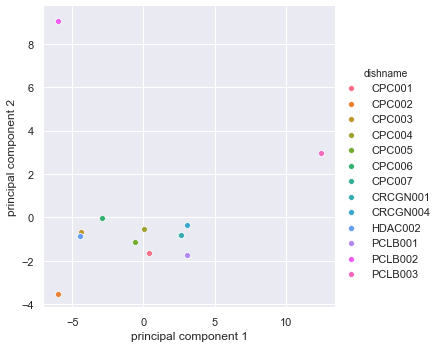

In [60]:
pca_DMSO = PCA(n_components=2)
principalComponents_DMSO = pca_DMSO.fit_transform(DMSO_averages.transpose())
principalComponents_DMSO = pd.DataFrame(data = principalComponents_DMSO
             , columns = ['principal component 1', 'principal component 2'])


groups=principalComponents_DMSO
groups["dishname"]= list(DMSO_averages.columns)


sns.pairplot(x_vars= 'principal component 1',
             y_vars='principal component 2',
             data=groups, hue="dishname", height=5)


In [61]:
DMSO_averages

,CPC001,CPC002,CPC003,CPC004,CPC005,CPC006,CPC007,CRCGN001,CRCGN004,HDAC002,PCLB001,PCLB002,PCLB003
EGF,0.132925,0.626482,0.261814,0.298510,0.097797,0.339050,0.161272,0.172876,0.096964,0.014047,0.331187,-0.096204,0.225977
NFATC4,0.310522,-0.222074,-0.248539,0.240109,-0.518104,0.127175,0.080968,0.114046,0.142401,-0.411546,-0.027872,0.418636,0.458170
HSPB1,0.034527,0.284512,0.206019,-0.012999,0.217169,0.036679,0.243555,-0.201743,-0.257257,0.289233,0.078744,0.025275,-0.390536
STAT3,0.862290,0.802155,0.332166,0.234640,0.432720,0.256691,0.045677,0.153363,-0.050825,0.229370,-0.117542,0.252750,-0.164230
PROS1,-0.013406,0.483022,0.403214,0.001050,0.187156,-0.033502,-0.374860,-0.288316,0.255175,0.416080,-0.773409,0.086720,-0.731619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-0.189756,-0.417864,-0.468332,-0.383850,-0.049790,-0.312675,-0.009080,-0.436598,-0.049430,-0.431174,0.065949,-0.553556,0.449566
UNC5B,-0.084177,-0.229933,-0.463065,-0.331106,-0.091356,-0.355360,0.082744,-0.263802,0.233757,-0.153661,-0.304237,-0.733738,0.569563
DENND2A,-0.001966,-0.666827,-0.327877,-0.060442,-0.096059,-0.279476,-0.088930,-0.091921,-0.106994,-0.247226,-0.100522,-0.382063,0.553525
CALHM2,-0.279278,-0.415349,-0.056071,-0.037711,0.250455,-0.126214,-0.221445,-0.283511,0.330348,0.126729,-0.331007,-0.068835,-0.263413


In [62]:
HA1E_ids_info


,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id,dish_name
sig_id,,,,,,,,,,,,
CNS001_HA1E_24H:DMSO:0.1,CNS001-DMSO,DMSO,ctl_vehicle.cns,HA1E,0.1,%,0.1 %,24,h,24 h,CPC003_HA1E_24H:DMSO:-666|CPC004_HA1E_24H:DMSO...,CPC003
CPC001_HA1E_24H:A17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC001_H...,CPC001
CPC001_HA1E_24H:B17,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:B17|CPC001_H...,CPC001
CPC001_HA1E_24H:B18,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,CPC001_HA1E_24H_X2_B3_DUO52HI53LO:B18,CPC001
CPC001_HA1E_24H:BRD-A00267231-001-01-1:10,BRD-A00267231,hemado,trt_cp,HA1E,10,µM,10 µM,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:N03|CPC001_H...,CPC001
...,...,...,...,...,...,...,...,...,...,...,...,...
PCLB003_HA1E_24H:BRD-K98109757-001-01-0:0.37,BRD-K98109757,cyclopentene,trt_cp,HA1E,0.37,µM,0.37 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:M22|PCLB003_HA1E_24H_X...,PCLB003
PCLB003_HA1E_24H:BRD-K98109757-001-01-0:1.11,BRD-K98109757,cyclopentene,trt_cp,HA1E,1.11,µM,1.11 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:M21|PCLB003_HA1E_24H_X...,PCLB003
PCLB003_HA1E_24H:BRD-K98109757-001-01-0:10,BRD-K98109757,cyclopentene,trt_cp,HA1E,10,µM,10 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:M19|PCLB003_HA1E_24H_X...,PCLB003


In [63]:
Tgfa_mouse_gctoo.data_df

cid,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,CPC001_HA1E_24H:BRD-K87991767-001-02-0:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
EGF,-0.033067,0.080542,0.854567,-0.327455,0.044007,-0.196267,1.115680,0.138313,1.897792,0.139022,...,10.0000,10.0000,10.0000,10.0000,3.03250,1.5546,-1.7100,3.4544,6.2276,2.8729
NFATC4,0.206633,0.341061,0.586433,0.073738,0.155655,0.586700,-0.883745,0.086939,-2.319941,0.357485,...,10.0000,3.7744,0.7482,10.0000,0.22390,-1.1191,0.3067,1.2316,-0.4178,-1.3631
HSPB1,-0.140300,0.594652,0.087200,0.424472,0.050928,-0.519133,0.390514,-0.020664,-3.679225,0.448004,...,-1.3322,-1.3067,-3.0008,-9.5916,-2.98325,-0.8634,-0.7317,-1.5454,-1.9709,-0.3756
STAT3,-0.138933,-0.303212,1.022933,-0.810232,0.734999,-0.218300,-0.520071,1.057253,2.011937,-0.206979,...,-1.9212,-2.3572,-3.0029,-1.7194,1.37930,2.3321,-1.9915,-0.8027,-0.9159,-0.9718
PROS1,0.178533,0.476983,0.886500,-0.595452,0.998136,0.402333,0.669477,0.928828,-1.803730,-0.310000,...,-0.9553,0.6391,-1.8728,8.9924,-0.13120,10.0000,2.2301,2.6250,0.8957,2.4689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-0.279400,0.633251,0.783667,-0.201995,-0.280378,0.392500,0.601703,-0.786787,1.496363,1.056694,...,9.4751,7.2821,6.8879,7.8201,5.44150,1.1566,2.1111,1.2727,1.0511,1.1250
UNC5B,0.708333,-0.189710,-0.263700,-0.007961,-0.797074,0.235067,0.526634,0.262092,0.308785,0.654042,...,7.2349,1.4393,5.4203,4.9206,3.05400,0.2521,2.5346,0.6034,-0.6005,-0.2825
DENND2A,-0.140567,-0.033477,0.359833,-0.264203,-0.822399,0.251367,-0.077965,-0.568759,0.167567,-0.930128,...,6.1157,3.5485,7.2972,5.4631,1.59805,1.6513,0.2735,0.4916,1.6264,1.2935
CALHM2,0.753200,-0.514996,-0.223367,-0.668027,0.109918,0.570533,-1.288179,-0.648970,-4.672332,0.524914,...,3.1572,2.0891,3.2950,0.7055,1.54840,-2.1393,-0.3357,0.2499,0.7969,0.5850


------
## Normalized Data of L1000 by DMSO averages in each plate

In [64]:
Normalized_L1000_data=Tgfa_mouse_gctoo.data_df

In [65]:
Samples_columns= list(Normalized_L1000_data.columns)

In [66]:
for i in Samples_columns:
    t_normalizer= HA1E_ids_info.loc[i,"dish_name"]
    Normalized_L1000_data[i]=Normalized_L1000_data[i]- DMSO_averages[t_normalizer]

In [67]:
Normalized_L1000_data

cid,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,CPC001_HA1E_24H:BRD-K87991767-001-02-0:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
EGF,-0.659549,-0.017256,0.756769,-0.460380,-0.088917,-0.494776,1.017883,-0.488169,1.271310,0.006098,...,9.774023,9.774023,9.774023,9.774023,2.806523,1.328623,-1.935977,3.228423,6.001623,2.646923
NFATC4,0.428708,0.859165,1.104537,-0.236783,-0.154866,0.346591,-0.365641,0.309014,-2.097866,0.046963,...,9.541830,3.316230,0.290030,9.541830,-0.234270,-1.577270,-0.151470,0.773430,-0.875970,-1.821270
HSPB1,-0.424812,0.377483,-0.129969,0.389945,0.016401,-0.506135,0.173345,-0.305176,-3.963737,0.413477,...,-0.941664,-0.916164,-2.610263,-9.201064,-2.592714,-0.472864,-0.341164,-1.154864,-1.580364,0.014936
STAT3,-0.941088,-0.735932,0.590213,-1.672522,-0.127291,-0.452940,-0.952792,0.255098,1.209782,-1.069269,...,-1.756970,-2.192970,-2.838670,-1.555170,1.543530,2.496330,-1.827270,-0.638470,-0.751670,-0.807570
PROS1,-0.304488,0.289827,0.699344,-0.582046,1.011542,0.401283,0.482321,0.445807,-2.286752,-0.296594,...,-0.223680,1.370719,-1.141181,9.724020,0.600419,10.731620,2.961720,3.356619,1.627319,3.200520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,0.138464,0.683041,0.833456,-0.012239,-0.090622,0.776350,0.651493,-0.368923,1.914227,1.246450,...,9.025534,6.832534,6.438334,7.370534,4.991934,0.707034,1.661534,0.823134,0.601534,0.675434
UNC5B,0.938267,-0.098353,-0.172344,0.076216,-0.712897,0.566173,0.617990,0.492025,0.538718,0.738219,...,6.665338,0.869737,4.850738,4.351037,2.484437,-0.317463,1.965037,0.033837,-1.170063,-0.852063
DENND2A,0.526260,0.062581,0.455892,-0.262237,-0.820433,0.311809,0.018094,0.098068,0.834394,-0.928162,...,5.562175,2.994975,6.743675,4.909575,1.044525,1.097775,-0.280025,-0.061925,1.072875,0.739975
CALHM2,1.168549,-0.765451,-0.473822,-0.388748,0.389196,0.608244,-1.538634,-0.233620,-4.256983,0.804193,...,3.420613,2.352513,3.558413,0.968913,1.811813,-1.875887,-0.072287,0.513313,1.060313,0.848413


In [68]:
Normalized_L1000_data.to_csv("normalized_L1000_HA1E_byDMSO.csv")

----

#### Change to semi-binary values

Slice significant genes from RNA-Seq

In [69]:
all_genes=list(Tgfa_mutant_DEG2.index)
sb_DEG_mouse_pd= sb_DEG_mouse.loc[ list(Normalized_L1000_data.index)]
sb_DEG_mouse_pd
#Counter(sb_DEG_mouse)

,MOUSE
EGF,1
NFATC4,-1
HSPB1,-1
STAT3,-1
PROS1,-1
...,...
ITIH4,-1
UNC5B,-1
DENND2A,-1
CALHM2,-1


In [70]:
print("Sig in L1000 ", sum(Normalized_L1000_data["CPC002_HA1E_24H:BRD-K26548821-001-01-8:10"].abs()>0.4))
print("Sig in RNA-Seq ", sum(sb_DEG_mouse_pd["MOUSE"].abs()>0))
print("total selected ", len(Normalized_L1000_data["CPC002_HA1E_24H:BRD-K26548821-001-01-8:10"]))



Sig in L1000  501
Sig in RNA-Seq  909
total selected  909


As you can see, all  selected genes from RNA-seq with cut-off 0.58 is in the selected genes. <br>
Maybe higher cut-off. I used 0.8 for RNA-Seq logFC and 0.4 for L100.<br>
Both had around 750 genes active



In [203]:
Normalized_L1000_data=pd.read_csv("normalized_L1000_HA1E_byDMSO.csv",index_col=0)
Normalized_L1000_data[Normalized_L1000_data>L1000_cutoff]= 1
Normalized_L1000_data[Normalized_L1000_data<(-1*L1000_cutoff)]= -1
Normalized_L1000_data[Normalized_L1000_data.abs()!=1]= 0



In [204]:
Normalized_L1000_data

,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,CPC001_HA1E_24H:BRD-K87991767-001-02-0:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
EGF,-1.0,0.0,1.0,-1.0,0.0,-1.0,1.0,-1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
NFATC4,1.0,1.0,1.0,0.0,0.0,1.0,-1.0,1.0,-1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,-1.0,0.0,1.0,-1.0,-1.0
HSPB1,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
STAT3,-1.0,-1.0,1.0,-1.0,0.0,-1.0,-1.0,0.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
PROS1,-1.0,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,0.0,...,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
UNC5B,1.0,0.0,0.0,0.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0
DENND2A,1.0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
CALHM2,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,0.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,1.0,1.0,1.0


Add the two databases together

In [205]:
Big_data=pd.concat([sb_DEG_mouse_pd,Normalized_L1000_data], axis=1)


In [206]:
Big_data

,MOUSE,CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,CPC005_HA1E_24H:BRD-A85280935-003-01-7:10,CPC005_HA1E_24H:BRD-A07824748-001-02-6:10,CPC001_HA1E_24H:BRD-A95445494-001-02-9:10,CPC001_HA1E_24H:BRD-K05906022-001-02-8:10,CPC004_HA1E_24H:BRD-K20482099-001-01-1:10,CPC005_HA1E_24H:BRD-K62929068-001-03-3:10,CPC002_HA1E_24H:BRD-K78294846-001-02-5:10,CPC002_HA1E_24H:BRD-K80348542-001-01-4:10,...,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:3.33,PCLB003_HA1E_24H:BRD-K01877528-001-10-7:0.04,PCLB003_HA1E_24H:BRD-K17953061-001-10-1:0.37,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:0.12,PCLB003_HA1E_24H:BRD-K78431006-001-05-2:10,PCLB003_HA1E_24H:BRD-K04466929-001-05-1:10,PCLB003_HA1E_24H:BRD-A36275421-001-06-1:10,PCLB003_HA1E_24H:BRD-K56411643-001-02-6:10,PCLB003_HA1E_24H:BRD-K24576554-001-01-4:10,PCLB003_HA1E_24H:BRD-A52530684-003-01-7:10
EGF,1,-1.0,0.0,1.0,-1.0,0.0,-1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
NFATC4,-1,1.0,1.0,1.0,0.0,0.0,1.0,-1.0,1.0,-1.0,...,1.0,1.0,0.0,1.0,0.0,-1.0,0.0,1.0,-1.0,-1.0
HSPB1,-1,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
STAT3,-1,-1.0,-1.0,1.0,-1.0,0.0,-1.0,-1.0,0.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
PROS1,-1,-1.0,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,...,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITIH4,-1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
UNC5B,-1,1.0,0.0,0.0,0.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0
DENND2A,-1,1.0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
CALHM2,-1,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,0.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,1.0,1.0,1.0


In [207]:
Big_data.to_csv("Mouse_L1000_all_normalized.csv")

# PCA

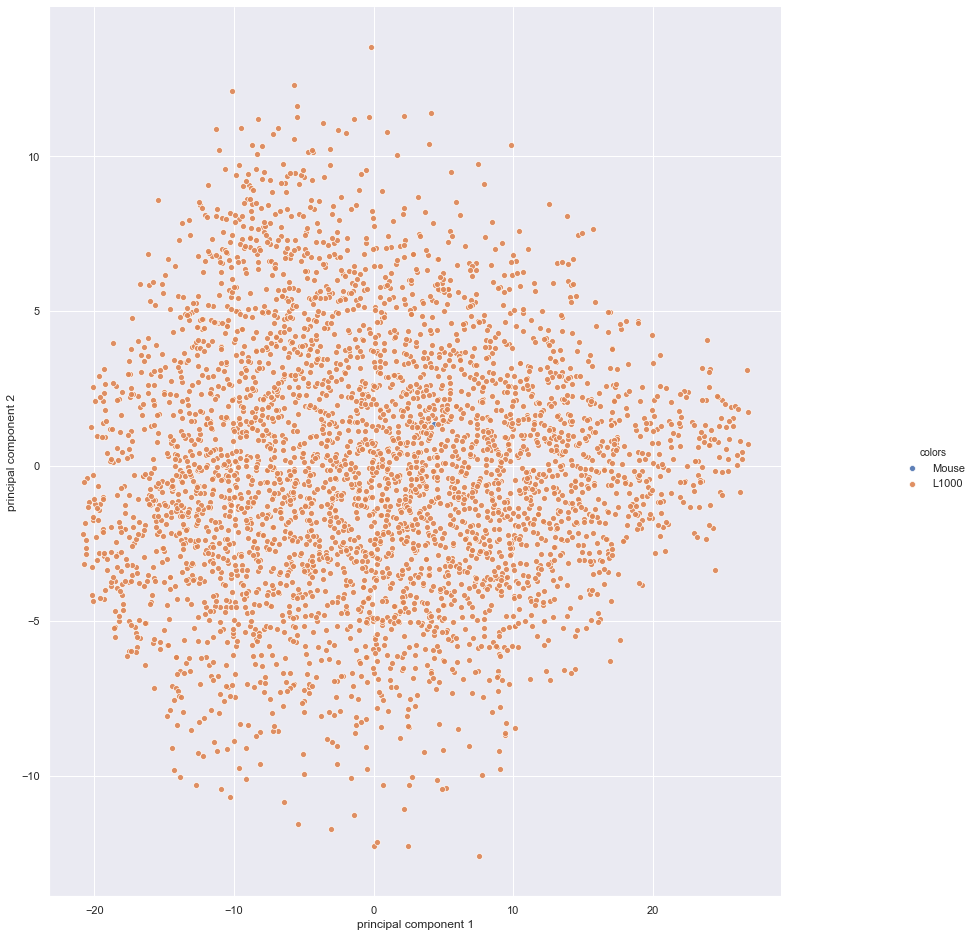

In [208]:
pca_DMSO = PCA(n_components=2)
principalComponents_DMSO = pca_DMSO.fit_transform(Big_data.transpose())
principalComponents_DMSO = pd.DataFrame(data = principalComponents_DMSO
             , columns = ['principal component 1', 'principal component 2'])


groups=principalComponents_DMSO
x= ["L1000"]*(len(list(Big_data.columns))-1)
x.insert(0,"Mouse")
groups["colors"]=x

g=sns.pairplot(x_vars= 'principal component 1',
             y_vars='principal component 2',
             data=groups, hue="colors" , height=5, plot_kws={'alpha':0.9})
g.fig.set_size_inches(15,15)


# t-SNE

In [78]:
import sklearn

from sklearn.manifold import TSNE
import time

In [79]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
df_subset=Big_data.transpose()
tsne_results = tsne.fit_transform(df_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

groups=principalComponents_DMSO
xx= ["L1000"]*(len(list(Big_data.columns))-1)
xx.insert(0,"Mouse")
df_subset["colors"]=x


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3912 samples in 0.094s...
[t-SNE] Computed neighbors for 3912 samples in 26.481s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3912
[t-SNE] Computed conditional probabilities for sample 2000 / 3912
[t-SNE] Computed conditional probabilities for sample 3000 / 3912
[t-SNE] Computed conditional probabilities for sample 3912 / 3912
[t-SNE] Mean sigma: 6.470970
[t-SNE] KL divergence after 250 iterations with early exaggeration: 143.973267
[t-SNE] KL divergence after 300 iterations: 6.177629
t-SNE done! Time elapsed: 36.36228847503662 seconds


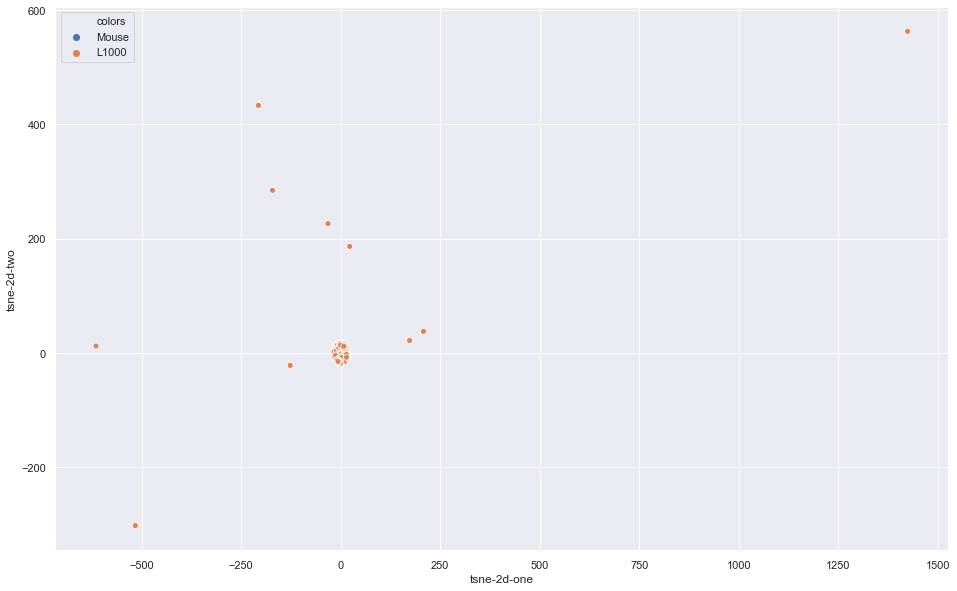

In [80]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="colors",
    #palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=1
)

In [81]:
tsne_results.shape

(3912, 2)

In [138]:
#Big_data=Big_data_temp

# Distance and correlation

In [209]:
#Big_data_temp=Big_data.transpose()
#Big_data=Big_data.transpose()

In [211]:
from sklearn.neighbors import DistanceMetric 
dist = DistanceMetric.get_metric('euclidean')
x=[list(Big_data.iloc[0]),list(Big_data.iloc[1])]
dist.pairwise(x)

array([[ 0.        , 71.72168431],
       [71.72168431,  0.        ]])

In [212]:
from scipy.spatial.distance import pdist
#pdist(Big_data.iloc[list(range(Big_data.shape[0]))])

from scipy.spatial.distance import squareform

dist_sqr= squareform(pdist(Big_data_temp.iloc[list(range(Big_data_temp.shape[0]))]))


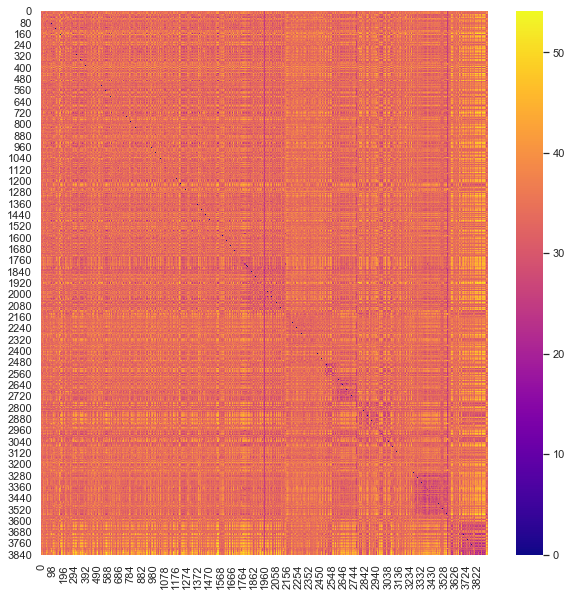

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(10,10))

sns.heatmap(dist_sqr, cmap='plasma')


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        5.600e+01, 9.710e+02, 2.455e+03, 4.290e+02]),
 array([ 0.        ,  4.03608721,  8.07217443, 12.10826164, 16.14434886,
        20.18043607, 24.21652328, 28.2526105 , 32.28869771, 36.32478493,
        40.36087214]),
 <a list of 10 Patch objects>)

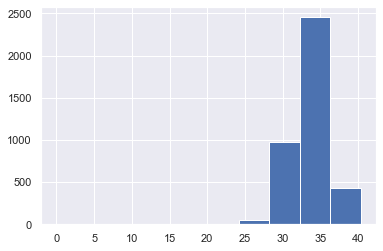

In [214]:
plt.hist(dist_sqr[1])

In [215]:
sum(dist_sqr[1]<25)

8

closest samples

In [216]:
closest=dist_sqr[1]<25

In [217]:
len(closest)

3912

In [218]:
closest_samples=list(Big_data.columns[closest])

In [219]:
Counter(HA1E_ids_info.loc[closest_samples]["pert_iname"])

Counter({'quinpirol-(-)': 1, 'DMSO': 7})

In [220]:
HA1E_ids_info.loc[closest_samples]

,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id,dish_name
sig_id,,,,,,,,,,,,
CPC002_HA1E_24H:BRD-K26548821-001-01-8:10,BRD-K26548821,quinpirol-(-),trt_cp,HA1E,10,µM,10 µM,24,h,24 h,CPC002_HA1E_24H_X1_B3_DUO52HI53LO:E23|CPC002_H...,CPC002
CPC001_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,CPC001_HA1E_24H_X1_B3_DUO52HI53LO:A17|CPC001_H...,CPC001
CPC002_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,CPC002_HA1E_24H_X1_B3_DUO52HI53LO:B17|CPC002_H...,CPC002
CPC003_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,CPC003_HA1E_24H_X1_B3_DUO52HI53LO:B17|CPC003_H...,CPC003
CPC006_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,CPC006_HA1E_24H_X1.A2_B4_DUO52HI53LO:A17|CPC00...,CPC006
CPC007_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,0.1,%,0.1 %,24,h,24 h,CPC007_HA1E_24H_X1_B3_DUO52HI53LO:E01|CPC007_H...,CPC007
PCLB002_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,PCLB002_HA1E_24H_X1_B13:A03|PCLB002_HA1E_24H_X...,PCLB002
PCLB003_HA1E_24H:DMSO:-666,DMSO,DMSO,ctl_vehicle,HA1E,-666,-666,-666,24,h,24 h,PCLB003_HA1E_24H_X1_B13:A03|PCLB003_HA1E_24H_X...,PCLB003


In [221]:
ss1=HA1E_ids_info.loc[closest_samples].index[0]

In [222]:
Big_data.iloc[:,0]

EGF        1
NFATC4    -1
HSPB1     -1
STAT3     -1
PROS1     -1
          ..
ITIH4     -1
UNC5B     -1
DENND2A   -1
CALHM2    -1
PKNOX2    -1
Name: MOUSE, Length: 909, dtype: int64

In [223]:
Big_data[ss1]

EGF       -1.0
NFATC4     1.0
HSPB1     -1.0
STAT3     -1.0
PROS1     -1.0
          ... 
ITIH4      0.0
UNC5B      1.0
DENND2A    1.0
CALHM2     1.0
PKNOX2    -1.0
Name: CPC002_HA1E_24H:BRD-K26548821-001-01-8:10, Length: 909, dtype: float64

In [224]:
from scipy.stats import pearsonr
pearsonr(Big_data.iloc[:,0], Big_data[ss1])

(-0.0009411200724567994, 0.9773946612818027)

In [225]:
all_corr=Big_data.corr()

/home/ros/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ros/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.110e+02, 1.858e+03, 1.569e+03, 7.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.20070693, -0.08063624,  0.03943446,  0.15950515,  0.27957584,
         0.39964654,  0.51971723,  0.63978792,  0.75985861,  0.87992931,
         1.        ]),
 <a list of 10 Patch objects>)

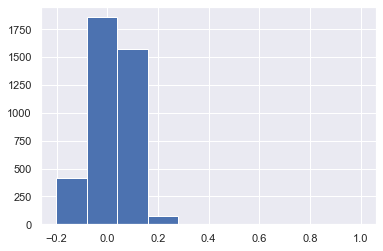

In [226]:
plt.hist(all_corr.iloc[0])

In [228]:
closest_samples=Big_data.columns[(all_corr.iloc[0]>0.2)]
HA1E_ids_info.loc[closest_samples]

/home/ros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id,dish_name
MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPC005_HA1E_24H:BRD-K50841342-001-01-6:10,BRD-K50841342,PAC-1,trt_cp,HA1E,10,µM,10 µM,24.0,h,24 h,CPC005_HA1E_24H_X1_B3_DUO52HI53LO:H19|CPC005_H...,CPC005
PCLB001_HA1E_24H:BRD-A19037878-001-02-3:3.33,BRD-A19037878,trichostatin-a,trt_cp,HA1E,3.33,µM,3 µM,24.0,h,24 h,PCLB001_HA1E_24H_X2_B12:A04|PCLB001_HA1E_24H_X...,PCLB001
PCLB002_HA1E_24H:BRD-K02130563:10,BRD-K02130563,panobinostat,trt_cp,HA1E,10,µM,10 µM,24.0,h,24 h,PCLB002_HA1E_24H_X1_B13:G07|PCLB002_HA1E_24H_X...,PCLB002
PCLB002_HA1E_24H:BRD-A19037878:3.33,BRD-A19037878,trichostatin-a,trt_cp,HA1E,3.33,µM,3.33 µM,24.0,h,24 h,PCLB002_HA1E_24H_X1_B13:I20|PCLB002_HA1E_24H_X...,PCLB002
PCLB002_HA1E_24H:BRD-K59773493:0.12,BRD-K59773493,benzohydroxamic-acid,trt_cp,HA1E,0.12,µM,0.12 µM,24.0,h,24 h,PCLB002_HA1E_24H_X1_B13:M05|PCLB002_HA1E_24H_X...,PCLB002


In [230]:
closest_samples=Big_data.columns[(all_corr.iloc[0]<(-1* 0.18))]
HA1E_ids_info.loc[closest_samples]

,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id,dish_name
CPC002_HA1E_24H:BRD-K08547377-003-03-2:10,BRD-K08547377,irinotecan,trt_cp,HA1E,10,µM,10 µM,24,h,24 h,CPC002_HA1E_24H_X1_B3_DUO52HI53LO:J19|CPC002_H...,CPC002
CPC002_HA1E_24H:BRD-K26241953-001-01-0:10,BRD-K26241953,piceatannol,trt_cp,HA1E,10,µM,10 µM,24,h,24 h,CPC002_HA1E_24H_X1_B3_DUO52HI53LO:G16|CPC002_H...,CPC002
PCLB001_HA1E_24H:BRD-K25444257-001-02-2:0.37,BRD-K25444257,MW-SHH-54,trt_cp,HA1E,0.37,µM,500 nM,24,h,24 h,PCLB001_HA1E_24H_X2_B12:J04|PCLB001_HA1E_24H_X...,PCLB001
PCLB003_HA1E_24H:BRD-K42573370-001-01-1:1.11,BRD-K42573370,avrainvillamide-analog-2,trt_cp,HA1E,1.11,µM,1.11 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:B15|PCLB003_HA1E_24H_X...,PCLB003
PCLB003_HA1E_24H:BRD-A52530684-003-01-7:1.11,BRD-A52530684,doxorubicin,trt_cp,HA1E,1.11,µM,1.11 µM,24,h,24 h,PCLB003_HA1E_24H_X1_B13:P15|PCLB003_HA1E_24H_X...,PCLB003
